In [1]:
import pandas as pd
import pycaret

In [2]:
df = pd.read_csv("Hotel Reservations.csv")

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

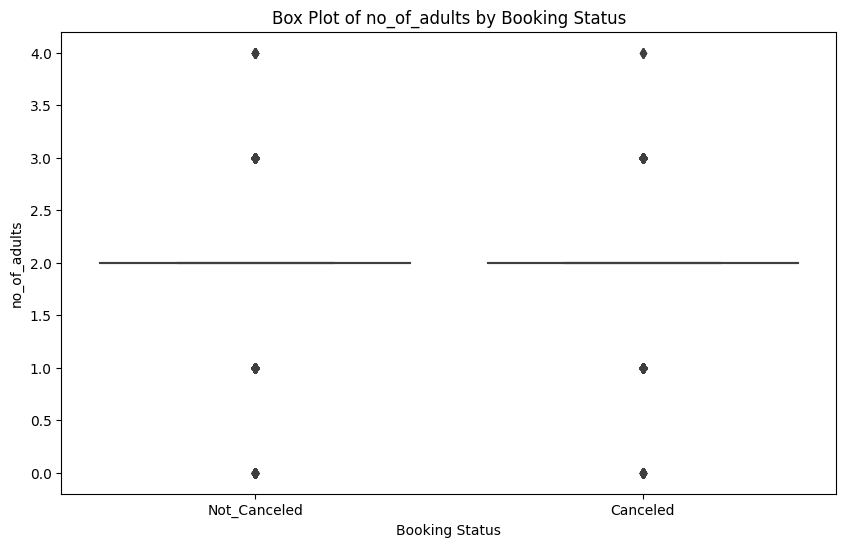

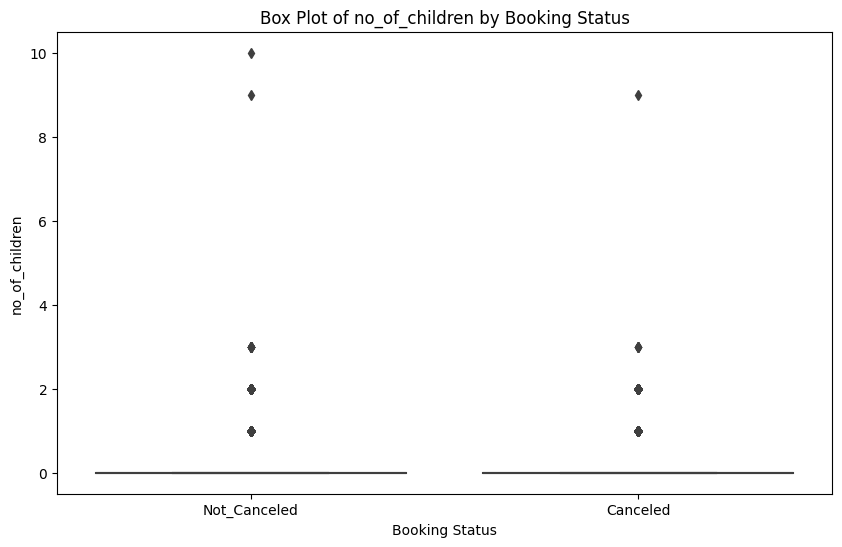

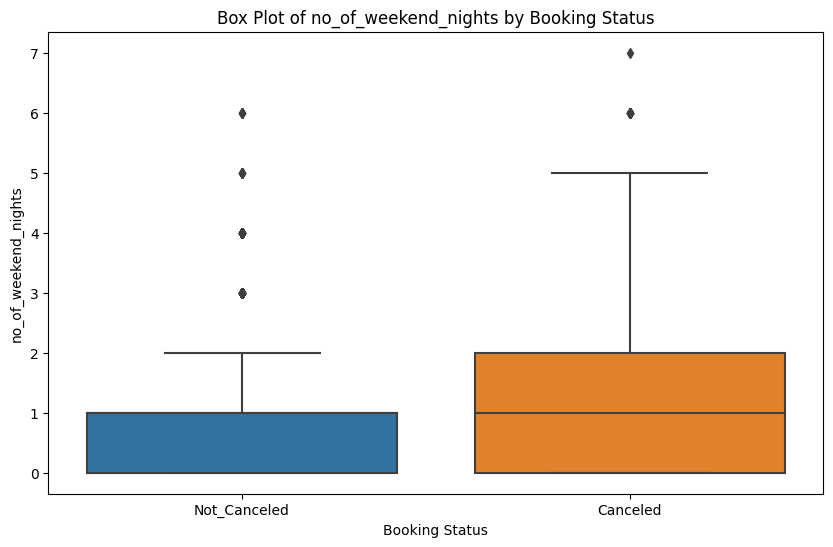

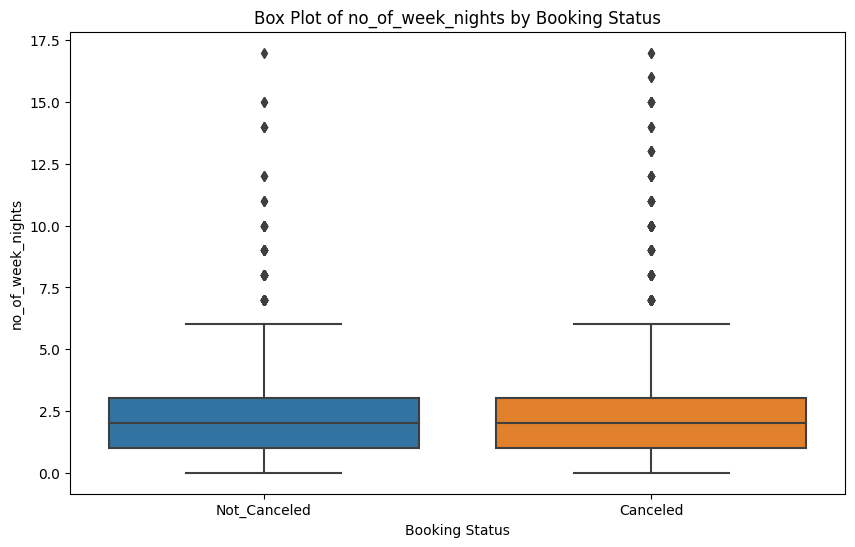

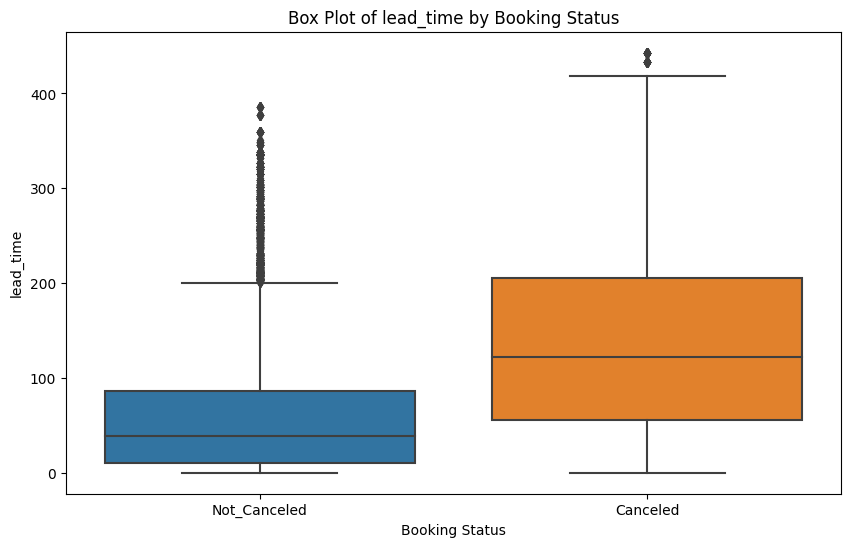

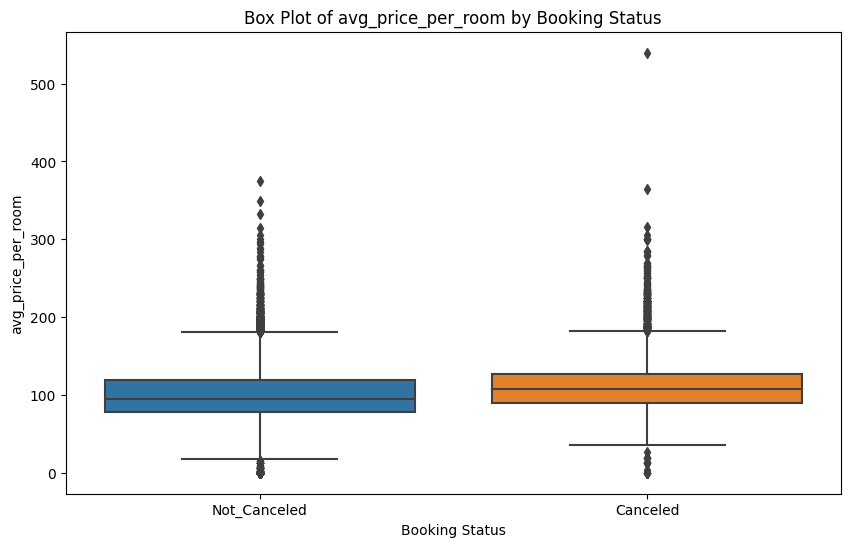

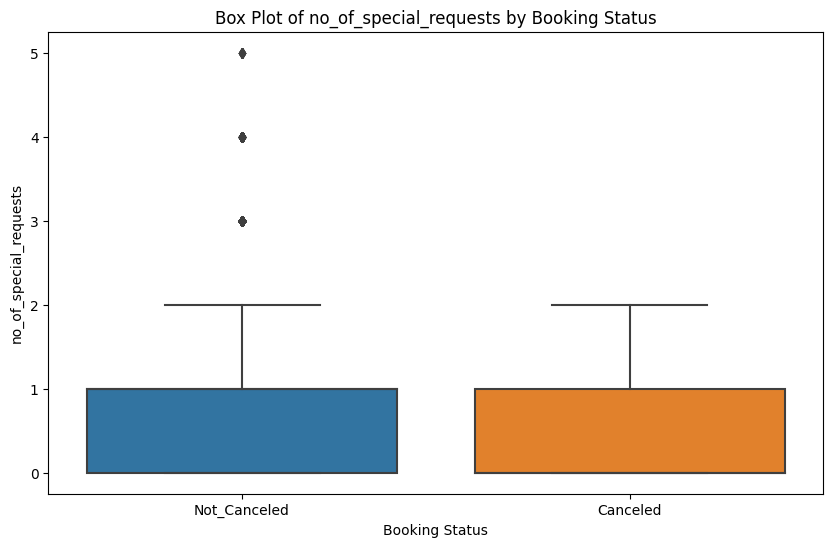

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load your dataset
df = pd.read_csv("Hotel Reservations.csv")

# Identify continuous variables
continuous_vars = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 
                   'lead_time', 'avg_price_per_room', 'no_of_special_requests']

# Create a box plot for each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='booking_status', y=var, data=df)
    plt.title(f'Box Plot of {var} by Booking Status')
    plt.xlabel('Booking Status')
    plt.ylabel(var)
    plt.show()


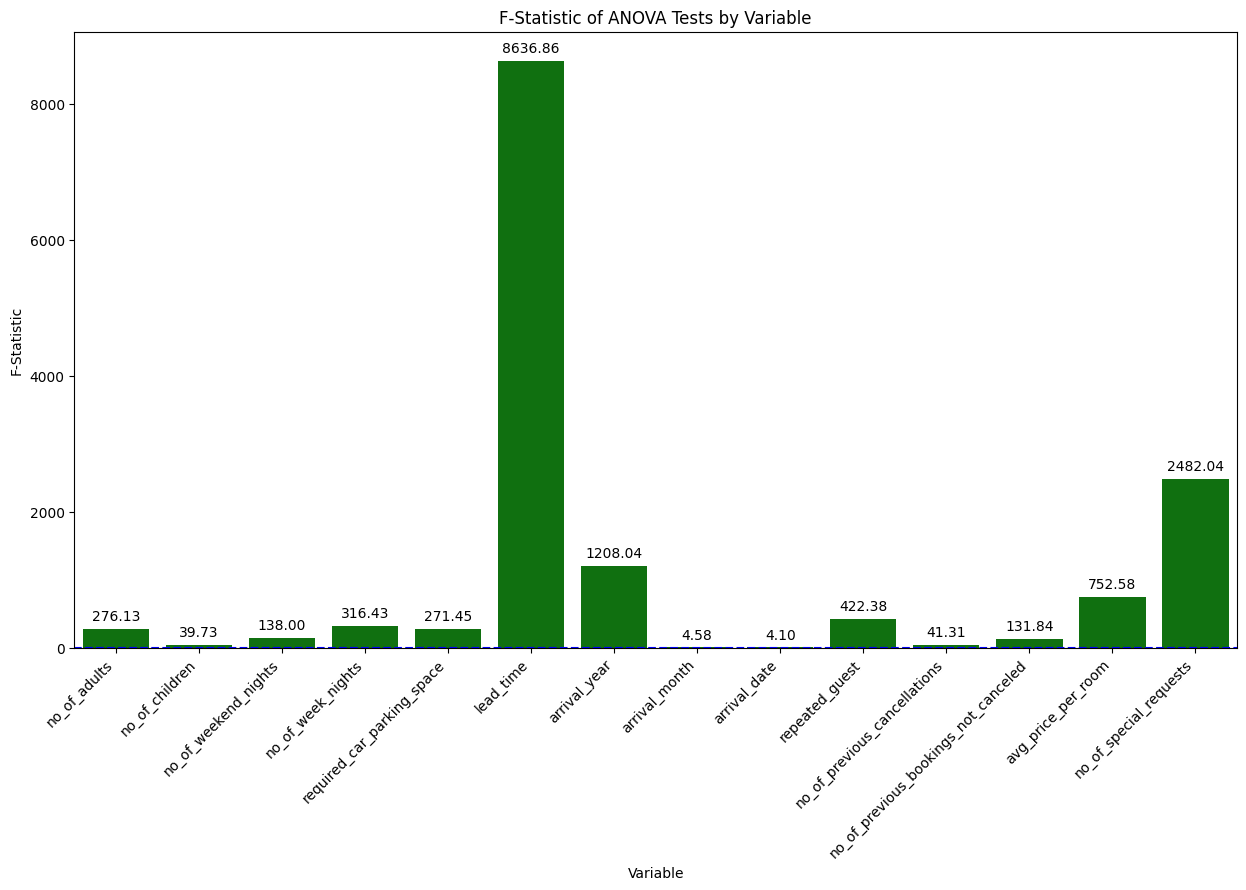

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ensure 'df' (your DataFrame) and 'booking_status_binary' are defined here
df['booking_status_binary'] = (df['booking_status'] == 'Not_Canceled').astype(int)

# Dependent variables
dependent_vars = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 
                  'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 
                  'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 
                  'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

# Dictionary to hold ANOVA results
anova_results = {}

# Conducting ANOVA (F-test) for each dependent variable
for var in dependent_vars:
    model = ols(f'{var} ~ C(booking_status_binary)', data=df).fit()
    anova_result = sm.stats.anova_lm(model, typ=2)
    anova_results[var] = {'F': anova_result['F'][0], 'PR(>F)': anova_result['PR(>F)'][0]}

# Converting results to DataFrame
anova_df = pd.DataFrame(anova_results).T
anova_df.reset_index(inplace=True)
anova_df.rename(columns={'index': 'Variable'}, inplace=True)
anova_df['Significant'] = anova_df['PR(>F)'] < 0.05

# Setting color based on significance
colors = ['green' if sig else 'red' for sig in anova_df['Significant']]

# Creating the plot
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(x='Variable', y='F', data=anova_df, hue='Variable', dodge=False, palette=colors)
plt.xticks(rotation=45, ha='right')
plt.title('F-Statistic of ANOVA Tests by Variable')
plt.ylabel('F-Statistic')
plt.xlabel('Variable')
plt.axhline(y=1, color='blue', linestyle='--')  # Threshold line for significance

# Adding labels to bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.legend([],[], frameon=False)  # Removing the legend
plt.show()


**Barlett's Test**

Bartlett's Test Results for Numerical Variables:
                            Variable  Bartlett Statistic       P-Value
                      repeated_guest        25319.994324  0.000000e+00
              no_of_special_requests         2041.128828  0.000000e+00
no_of_previous_bookings_not_canceled        52236.939876  0.000000e+00
        no_of_previous_cancellations         4031.849521  0.000000e+00
                        arrival_year         2627.474161  0.000000e+00
             no_of_previous_bookings        34784.177970  0.000000e+00
          required_car_parking_space         6614.144246  0.000000e+00
                           lead_time         3251.384415  0.000000e+00
                          no_of_days          822.165279 8.184873e-181
                                week          624.914856 6.379706e-138
                       arrival_month          620.916828 4.724443e-137
                   no_of_week_nights          614.255526 1.327910e-135
                      no_of_

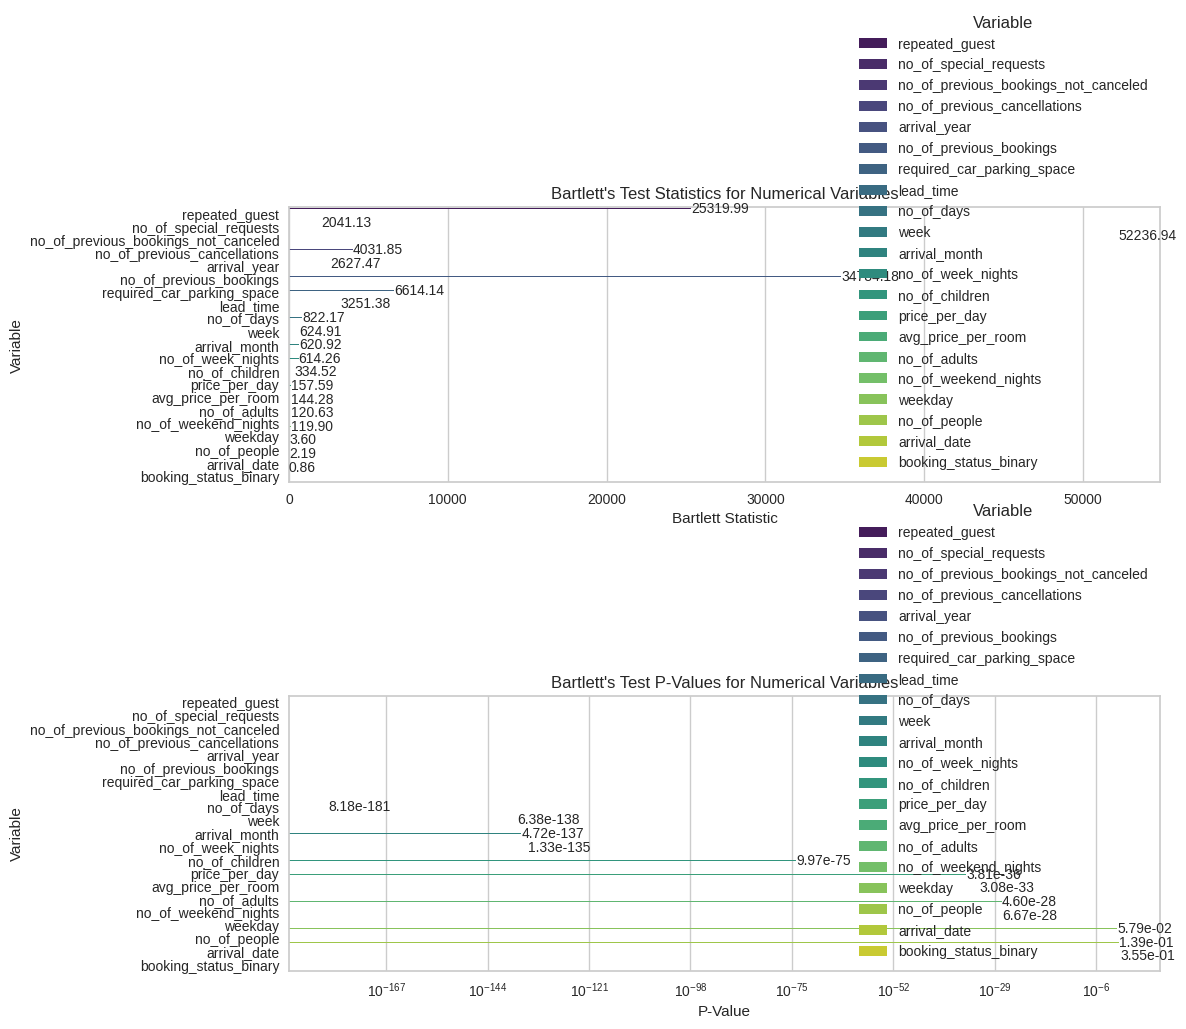

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bartlett

# Identifying numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize lists to store variable names, test statistics, and p-values
variables = []
test_statistics = []
p_values = []

# Iterate over each numerical column and perform Bartlett's test
for col in numerical_columns:
    # Perform Bartlett's test
    stat, p_value = bartlett(df[col][df['booking_status'] == 'Not_Canceled'],
                             df[col][df['booking_status'] == 'Canceled'])
    
    variables.append(col)
    test_statistics.append(stat)
    p_values.append(p_value)

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Variable': variables, 'Bartlett Statistic': test_statistics, 'P-Value': p_values})

# Sort the DataFrame by p-values
results_df = results_df.sort_values(by='P-Value')

# Print the test results
print("Bartlett's Test Results for Numerical Variables:")
print(results_df.to_string(index=False))

# Create subplots for test statistics and p-values
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4)

# Bar chart for test statistics with labeled values
sns.barplot(data=results_df, x='Bartlett Statistic', y='Variable', hue='Variable', ax=axes[0], palette='viridis')
axes[0].set_xlabel('Bartlett Statistic')
axes[0].set_ylabel('Variable')
axes[0].set_title("Bartlett's Test Statistics for Numerical Variables")

# Label values on the test statistics bars
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_width():.2f}", (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', fontsize=10)

# Bar chart for p-values with labeled values
sns.barplot(data=results_df, x='P-Value', y='Variable', hue='Variable', ax=axes[1], palette='viridis')
axes[1].set_xlabel('P-Value')
axes[1].set_ylabel('Variable')
axes[1].set_title("Bartlett's Test P-Values for Numerical Variables")
axes[1].set_xscale('log')  # Use a log scale for better visualization of small p-values

# Label values on the p-values bars
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_width():.2e}", (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', fontsize=10)

# Rotate y-axis labels for better readability
for ax in axes:
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')

plt.tight_layout()
plt.show()



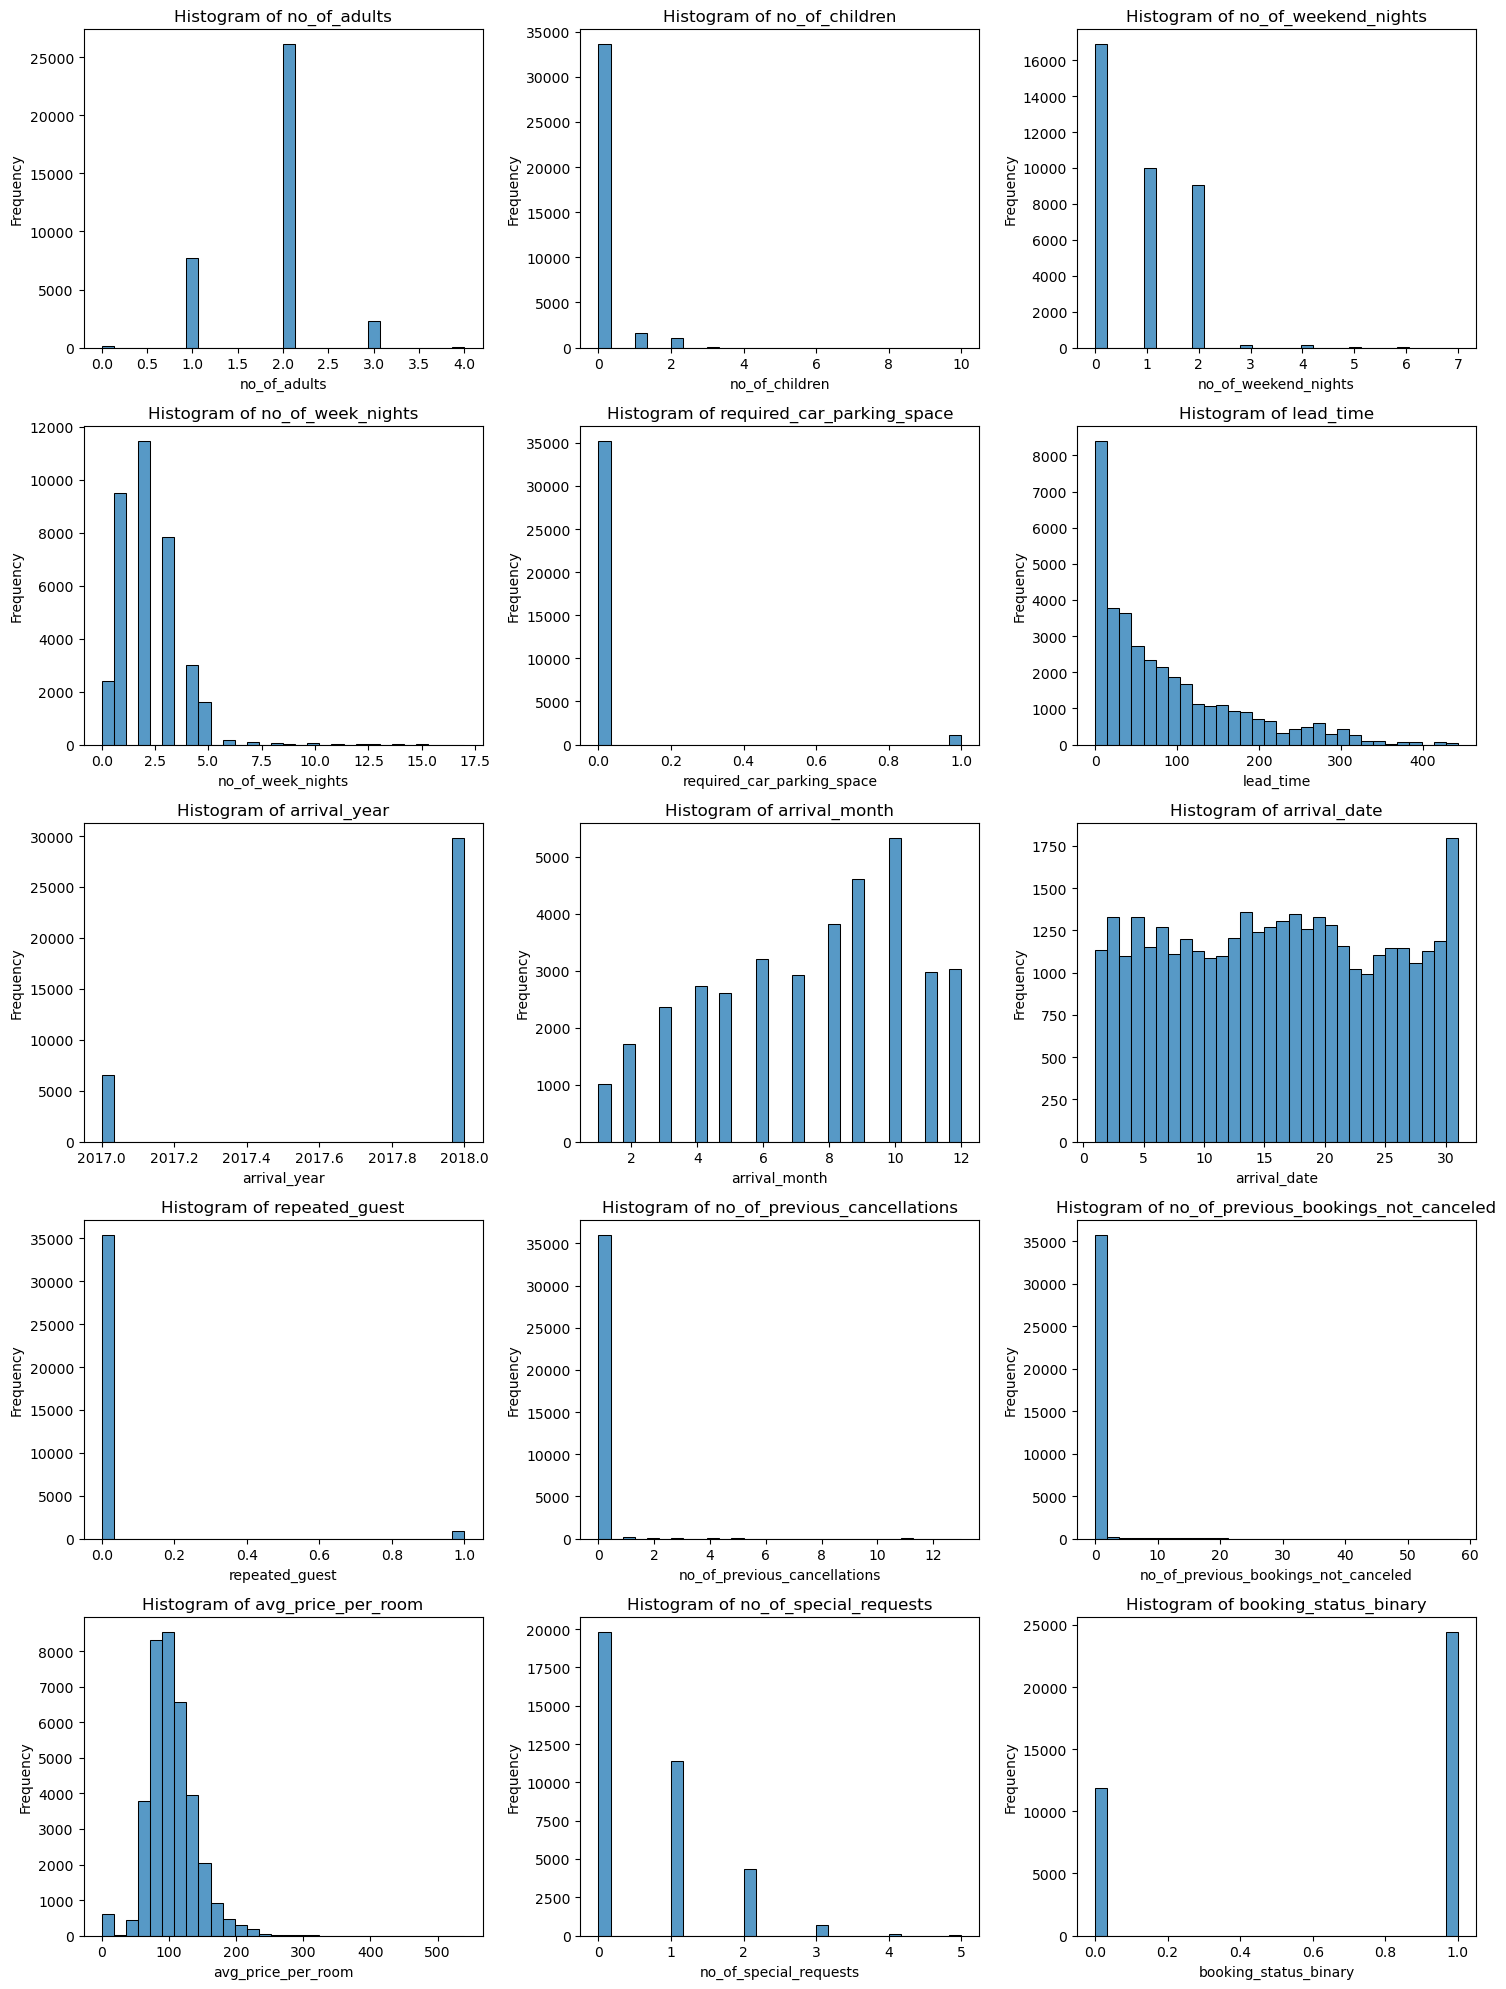

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
# Replace 'df' with the name of your DataFrame

# Filter out numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set the number of columns in the grid
grid_columns = 3  # You can adjust this as needed

# Calculate the number of rows needed in the grid
grid_rows = len(numerical_columns) // grid_columns + (len(numerical_columns) % grid_columns > 0)

# Set up the matplotlib figure
plt.figure(figsize=(15, grid_rows * 4))

# Loop through the numerical columns and add a subplot for each histogram
for i, column in enumerate(numerical_columns):
    plt.subplot(grid_rows, grid_columns, i + 1)
    sns.histplot(df[column], kde=False, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()



**Welch's T-test**

no_of_adults: Welch's T-statistic = -17.128164318616523, P-value = 2.125195840461949e-65
no_of_children: Welch's T-statistic = -6.00254864970683, P-value = 1.9746021531473454e-09
no_of_weekend_nights: Welch's T-statistic = -11.404331402625395, P-value = 4.838631407811381e-30
no_of_week_nights: Welch's T-statistic = -16.672340896210997, P-value = 5.450111353334159e-62
required_car_parking_space: Welch's T-statistic = 20.424227507930006, P-value = 3.3680680766878884e-92
lead_time: Welch's T-statistic = -80.6166015847791, P-value = 0.0
arrival_year: Welch's T-statistic = -40.01255249944664, P-value = 0.0
arrival_month: Welch's T-statistic = 2.292573704258651, P-value = 0.021879873347925644
arrival_date: Welch's T-statistic = -2.019263390564733, P-value = 0.043471227593661385
repeated_guest: Welch's T-statistic = 28.632791649318087, P-value = 9.739644968354598e-178
no_of_previous_cancellations: Welch's T-statistic = 7.634520795656244, P-value = 2.3238269828901563e-14
no_of_previous_booking

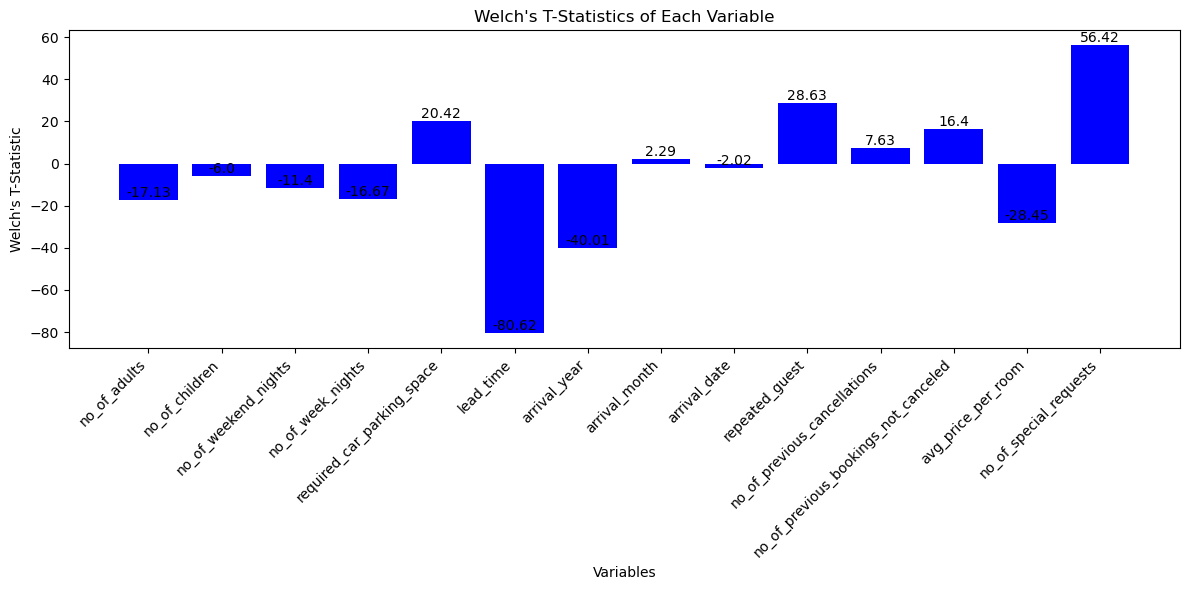

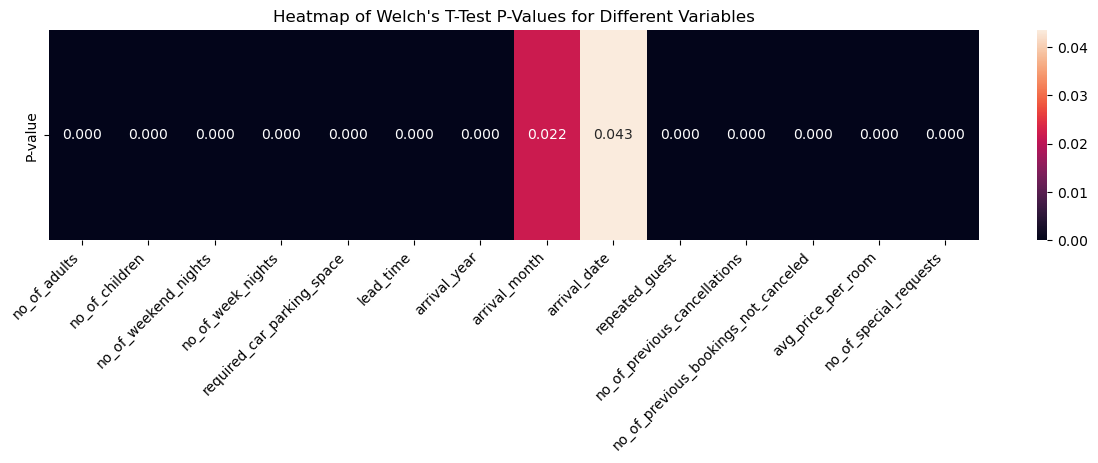

In [6]:
from scipy.stats import ttest_ind

df['booking_status_binary'] = (df['booking_status'] == 'Not_Canceled').astype(int)

# Independent variable
independent_var = 'booking_status_binary'

# Dependent variables
dependent_vars = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 
                  'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 
                  'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 
                  'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

# Conducting Welch's T-tests for each dependent variable
welch_t_test_results = {}

for var in dependent_vars:
    group1 = df[df[independent_var] == 1][var]
    group2 = df[df[independent_var] == 0][var]
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False, nan_policy='omit')
    welch_t_test_results[var] = {'t_statistic': t_stat, 'p_value': p_value}

# Display the results
for var, result in welch_t_test_results.items():
    print(f"{var}: Welch's T-statistic = {result['t_statistic']}, P-value = {result['p_value']}")

# Preparing data for bar graph
variables = list(welch_t_test_results.keys())
t_statistics = [welch_t_test_results[var]['t_statistic'] for var in variables]

# Creating the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(variables, t_statistics, color='blue')

# Adding the text labels for the Welch's T-statistics
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.xlabel('Variables')
plt.ylabel("Welch's T-Statistic")
plt.xticks(rotation=45, ha='right')
plt.title("Welch's T-Statistics of Each Variable")
plt.tight_layout()
plt.show()

# Extracting p-values and variable names
p_values = [result['p_value'] for result in welch_t_test_results.values()]
variables = list(welch_t_test_results.keys())

# Converting to a 2D matrix for heatmap (using a single row)
p_values_matrix = [p_values]

# Creating the heatmap
plt.figure(figsize=(15, 3))  # Increased figure size
sns.heatmap(p_values_matrix, annot=True, fmt=".3f", xticklabels=variables, yticklabels=['P-value'])
plt.title("Heatmap of Welch's T-Test P-Values for Different Variables")
plt.xticks(rotation=45, ha='right')  # Rotate the variable names for better readability

# Adjusting layout
plt.subplots_adjust(bottom=0.2, top=0.9)

plt.show()

**F-Test( Welch's ANOVA)**

Welch's ANOVA Analysis Results:
                                Variable            F          p-unc  \
0                           no_of_adults   293.374013   2.125196e-65   
1                         no_of_children    36.030590   1.974602e-09   
2                   no_of_weekend_nights   130.058775   4.838631e-30   
3                      no_of_week_nights   277.966951   5.450111e-62   
4             required_car_parking_space   417.149069   3.368068e-92   
5                              lead_time  6499.036451   0.000000e+00   
6                           arrival_year  1601.004358   0.000000e+00   
7                          arrival_month     5.255894   2.187987e-02   
8                           arrival_date     4.077425   4.347123e-02   
9                         repeated_guest   819.836758  9.739645e-178   
10          no_of_previous_cancellations    58.285908   2.323827e-14   
11  no_of_previous_bookings_not_canceled   269.013200   3.867328e-60   
12                    avg_price_

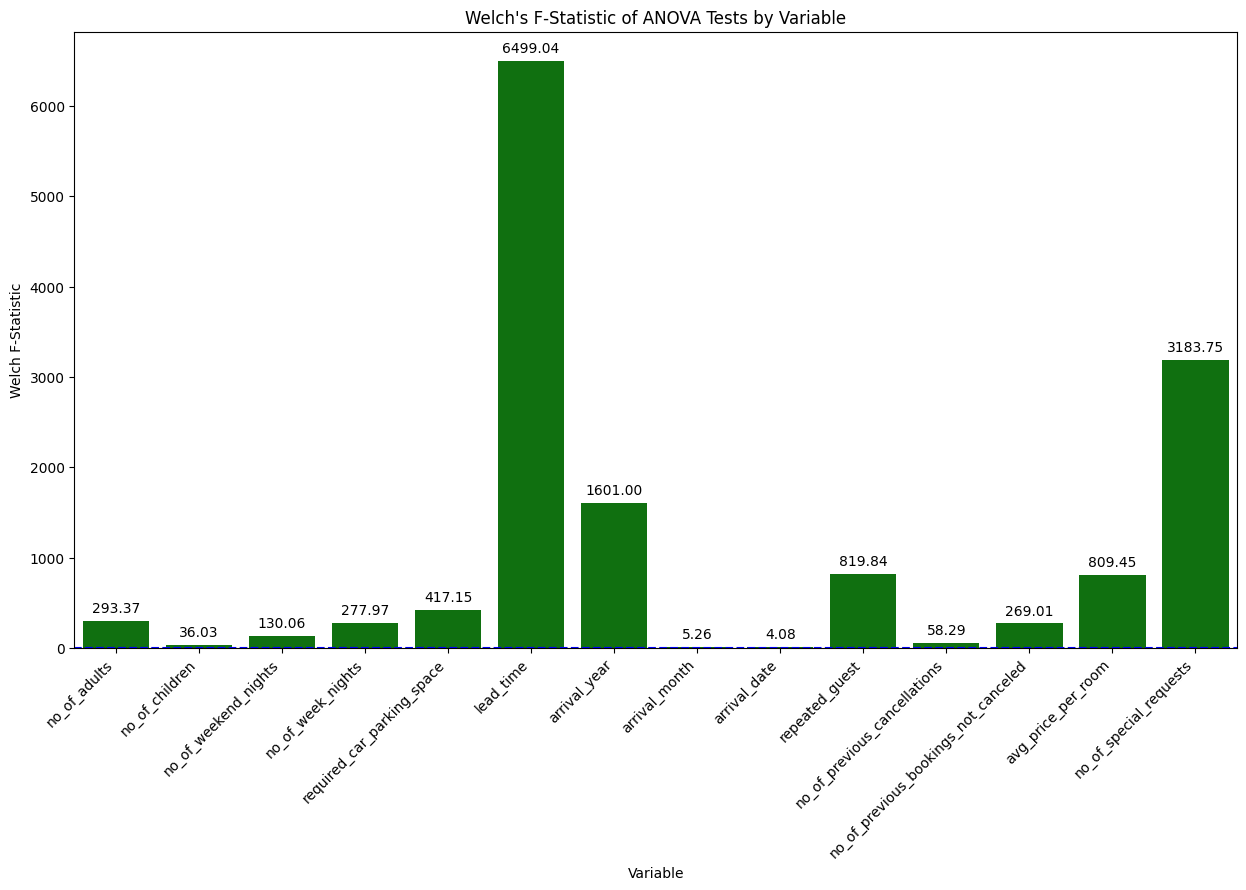

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg  


# Dependent variables
dependent_vars = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 
                  'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 
                  'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 
                  'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

# Dictionary to hold Welch's ANOVA results
welch_anova_results = {}

# Conducting Welch's ANOVA for each dependent variable
for var in dependent_vars:
    anova_result = pg.welch_anova(data=df, dv=var, between='booking_status_binary')
    welch_anova_results[var] = {'F': anova_result['F'][0], 'p-unc': anova_result['p-unc'][0]}

# Converting results to DataFrame
welch_anova_df = pd.DataFrame(welch_anova_results).T
welch_anova_df.reset_index(inplace=True)
welch_anova_df.rename(columns={'index': 'Variable'}, inplace=True)
welch_anova_df['Significant'] = welch_anova_df['p-unc'] < 0.05

# Print Welch's ANOVA Results DataFrame
print("Welch's ANOVA Analysis Results:")
print(welch_anova_df)

# Setting color based on significance
colors = ['green' if sig else 'red' for sig in welch_anova_df['Significant']]

# Creating the plot
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(x='Variable', y='F', data=welch_anova_df, hue='Variable', dodge=False, palette=colors)
plt.xticks(rotation=45, ha='right')
plt.title("Welch's F-Statistic of ANOVA Tests by Variable")
plt.ylabel('Welch F-Statistic')
plt.xlabel('Variable')
plt.axhline(y=1, color='blue', linestyle='--')  # Threshold line for significance

# Adding labels to bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

plt.legend([], [], frameon=False)  # Removing the legend
plt.show()


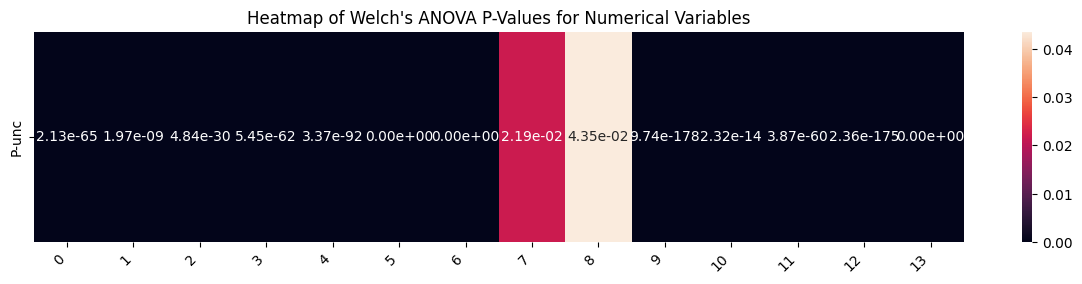

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting p-values and variable names
p_values = welch_anova_df['p-unc']
variables = welch_anova_df.index  # Use the index as variable names

# Converting to a 2D matrix for heatmap (using a single row)
p_values_matrix = [p_values]

# Creating the heatmap
plt.figure(figsize=(15, 3))  # Increased figure size
sns.heatmap(p_values_matrix, annot=True, fmt=".2e", xticklabels=variables, yticklabels=['P-unc'])
plt.title("Heatmap of Welch's ANOVA P-Values for Numerical Variables")
plt.xticks(rotation=45, ha='right')  # Rotate the variable names for better readability

# Adjusting layout
plt.subplots_adjust(bottom=0.2, top=0.9)

plt.show()


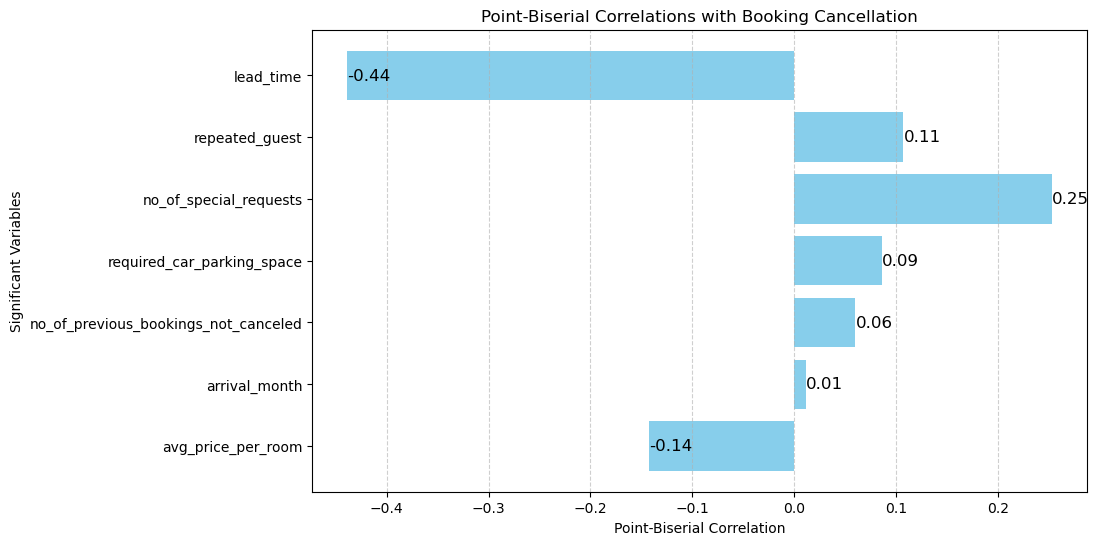

In [9]:
import matplotlib.pyplot as plt
import scipy.stats as stats



# List of significant predictor variables
significant_vars = ['lead_time', 'repeated_guest', 'no_of_special_requests',
                    'required_car_parking_space', 'no_of_previous_bookings_not_canceled',
                    'arrival_month', 'avg_price_per_room']

# Calculate Point-Biserial Correlation for each significant variable
point_biserial_correlations = {}

for var in significant_vars:
    point_biserial_corr, _ = stats.pointbiserialr(df['booking_status_binary'], df[var])
    point_biserial_correlations[var] = point_biserial_corr

# Create a bar chart to visualize the Point-Biserial Correlations
plt.figure(figsize=(10, 6))
bars = plt.barh(significant_vars, point_biserial_correlations.values(), color='skyblue')
plt.xlabel('Point-Biserial Correlation')
plt.ylabel('Significant Variables')
plt.title('Point-Biserial Correlations with Booking Cancellation')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Annotate the bars with the Point-Biserial Correlation values
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), va='center', fontsize=12)

plt.show()


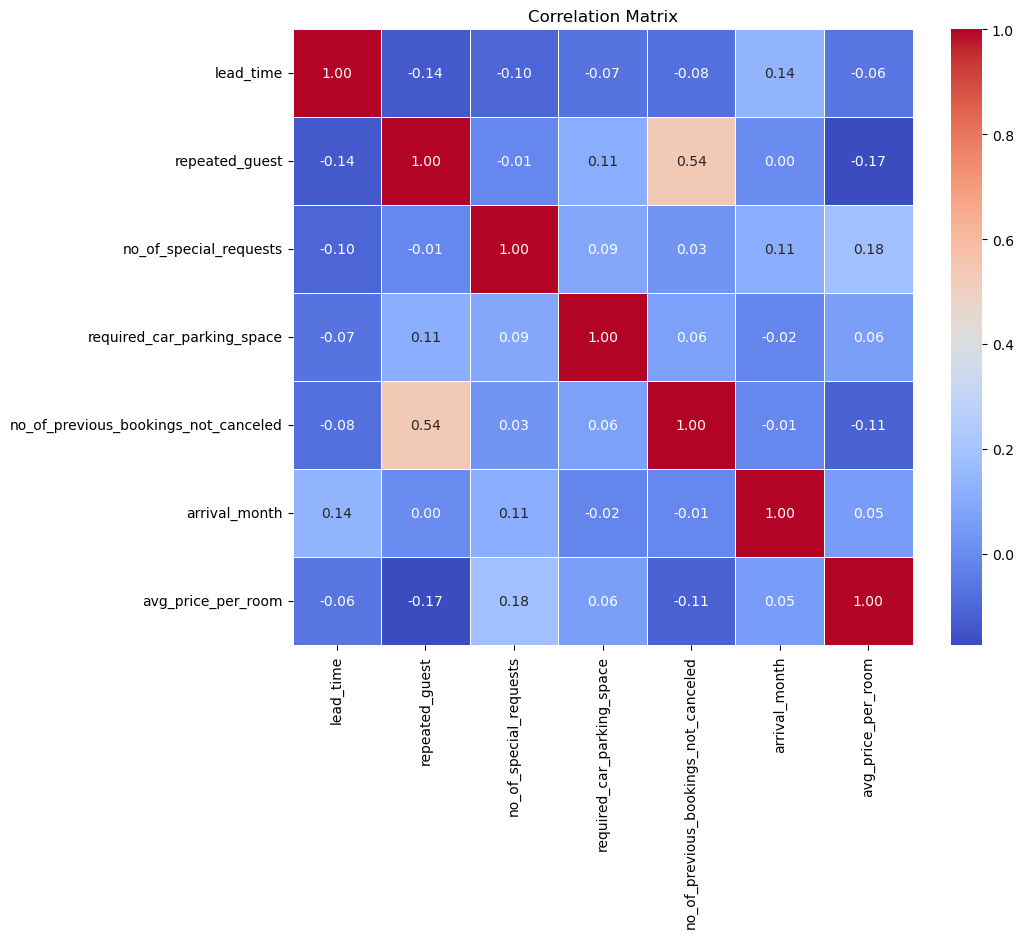

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subset of your dataset with significant variables
significant_vars = df[['lead_time', 'repeated_guest', 'no_of_special_requests', 'required_car_parking_space',
                        'no_of_previous_bookings_not_canceled', 'arrival_month', 'avg_price_per_room', ]]

# Calculate the correlation matrix
correlation_matrix = significant_vars.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
df["room_type_reserved"].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [24]:
df["market_segment_type"].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [25]:
df["no_of_days"] = df["no_of_weekend_nights"] + df["no_of_week_nights"]

In [26]:
import seaborn as sn

<AxesSubplot: xlabel='no_of_days', ylabel='Count'>

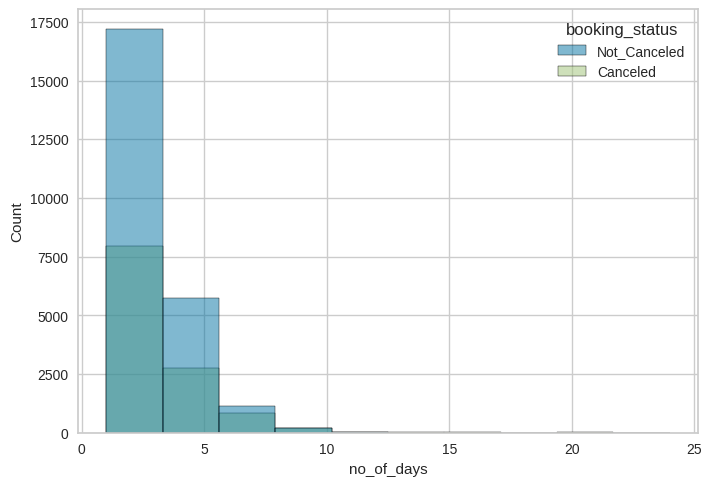

In [80]:
sn.histplot(data=df,x="no_of_days", hue="booking_status", bins=10)

<AxesSubplot: xlabel='lead_time', ylabel='booking_status'>

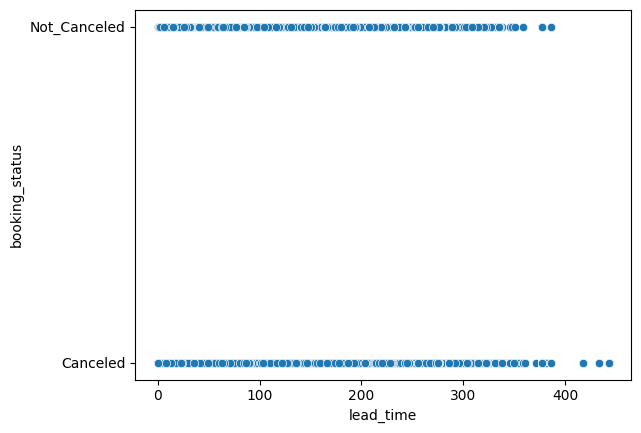

In [28]:
sn.scatterplot(data=df, x="lead_time", y="booking_status")

In [29]:
df["type_of_meal_plan"].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

<AxesSubplot: xlabel='type_of_meal_plan', ylabel='count'>

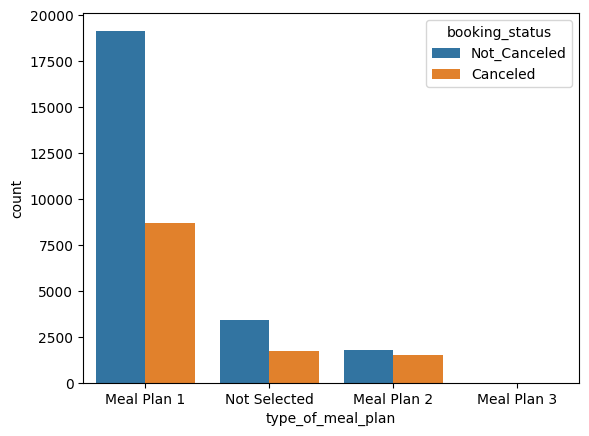

In [30]:
sn.countplot(data=df, x="type_of_meal_plan", hue="booking_status")

<AxesSubplot: xlabel='count', ylabel='room_type_reserved'>

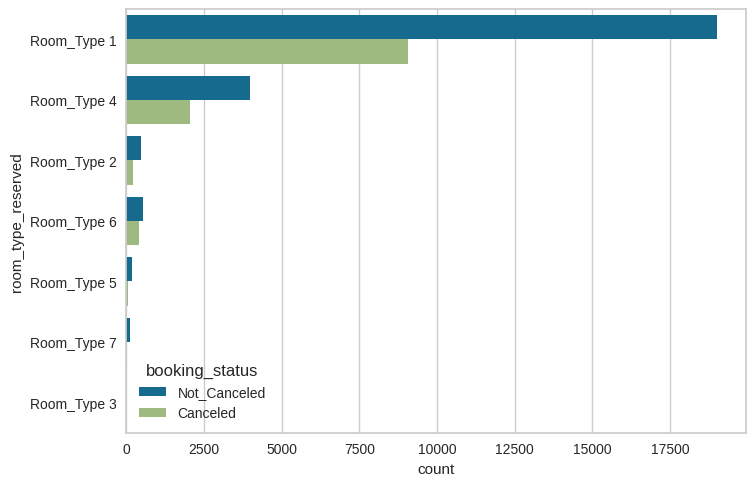

In [81]:
sn.countplot(data=df, y="room_type_reserved", hue="booking_status")

<AxesSubplot: xlabel='lead_time', ylabel='Count'>

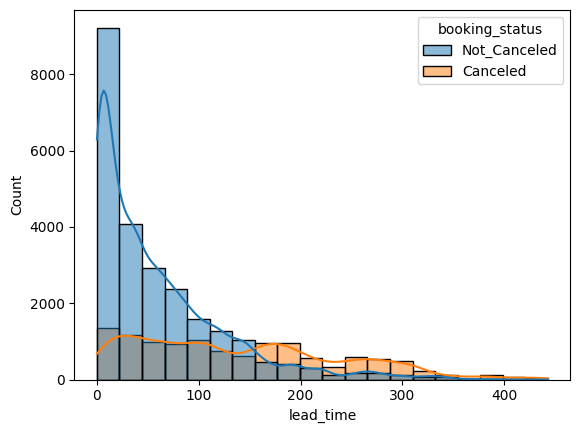

In [32]:
sn.histplot(data=df, x="lead_time", hue="booking_status", bins=20, kde=True)

<AxesSubplot: xlabel='avg_price_per_room', ylabel='booking_status'>

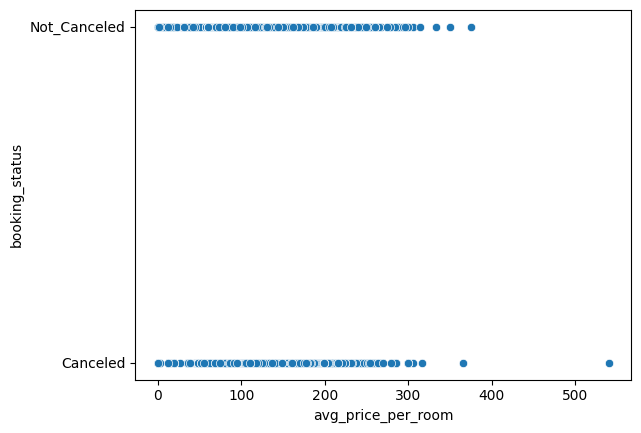

In [33]:
sn.scatterplot(data=df, x="avg_price_per_room", y="booking_status")

<AxesSubplot: xlabel='avg_price_per_room', ylabel='Count'>

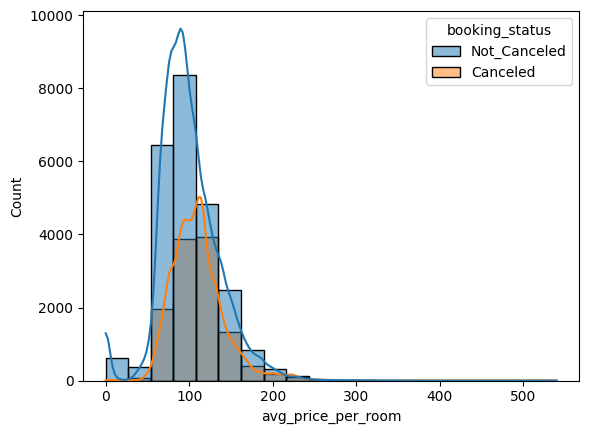

In [34]:
sn.histplot(data=df, x="avg_price_per_room", hue="booking_status", bins=20, kde=True)

<AxesSubplot: xlabel='no_of_days', ylabel='avg_price_per_room'>

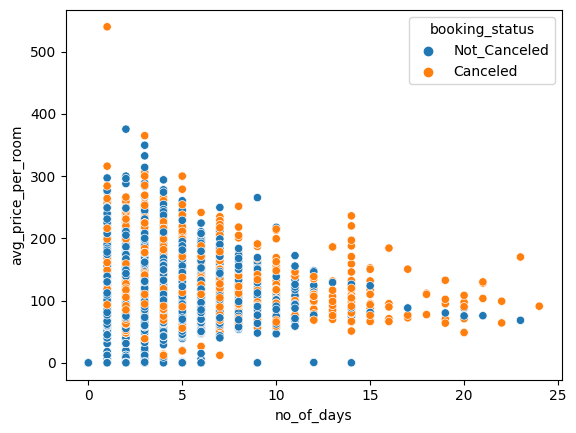

In [35]:
sn.scatterplot(data=df,x="no_of_days",y="avg_price_per_room", hue="booking_status")

<AxesSubplot: xlabel='no_of_days', ylabel='Count'>

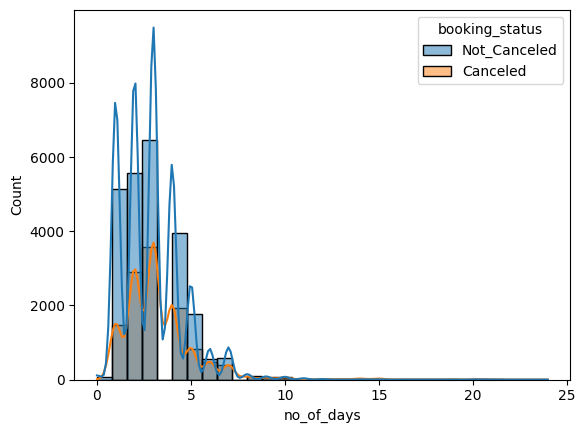

In [36]:
sn.histplot(data=df, x="no_of_days", hue="booking_status", bins=30, kde=True)

<AxesSubplot: xlabel='avg_price_per_room', ylabel='lead_time'>

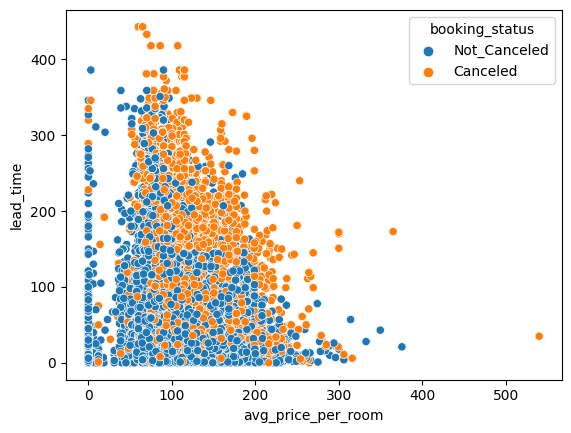

In [37]:
sn.scatterplot(data=df,x="avg_price_per_room",y="lead_time", hue="booking_status")

<AxesSubplot: xlabel='market_segment_type', ylabel='count'>

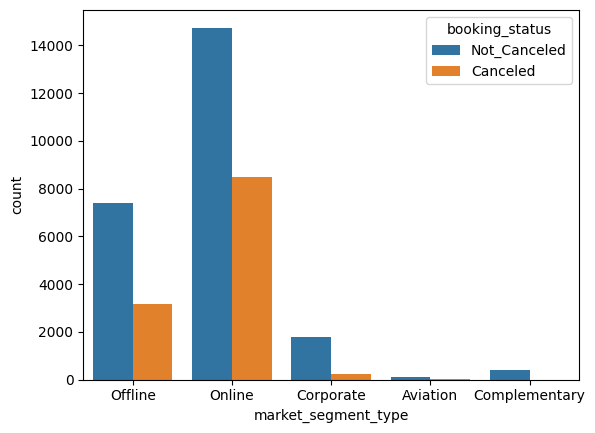

In [38]:
sn.countplot(data=df, x="market_segment_type", hue="booking_status")

In [40]:
df = df[~(df["no_of_days"] == 0)]
df["price_per_day"]  = df["avg_price_per_room"]/df["no_of_days"]

<AxesSubplot: xlabel='price_per_day', ylabel='no_of_days'>

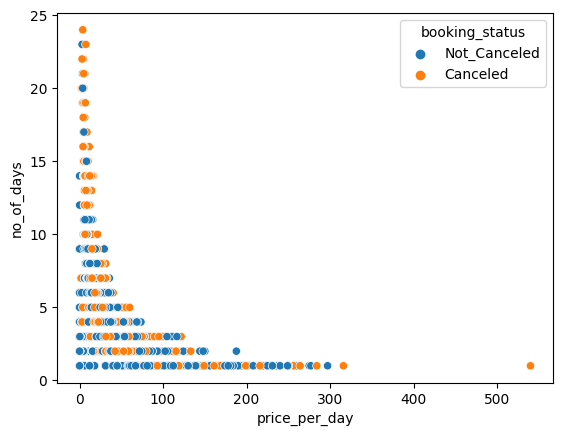

In [41]:
sn.scatterplot(data=df,x="price_per_day",y="no_of_days", hue="booking_status")

In [42]:
df["price_per_day"].describe()

count    36197.000000
mean        47.153428
std         34.483210
min          0.000000
25%         24.083333
50%         36.600000
75%         58.050000
max        540.000000
Name: price_per_day, dtype: float64

<AxesSubplot: xlabel='type_of_meal_plan', ylabel='count'>

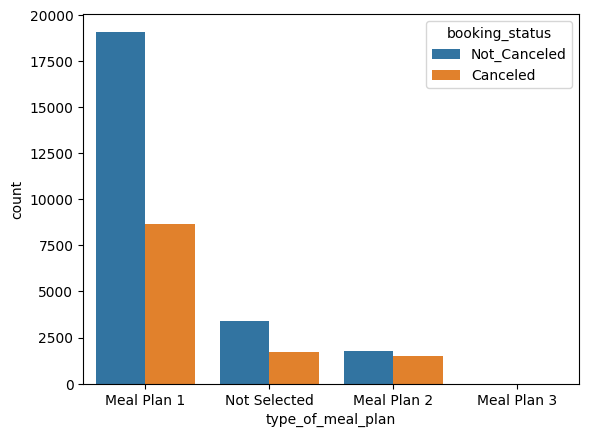

In [43]:
# Meal Plan Selected vs cancelation 
sn.countplot(data=df, x="type_of_meal_plan", hue="booking_status")

<AxesSubplot: xlabel='market_segment_type', ylabel='count'>

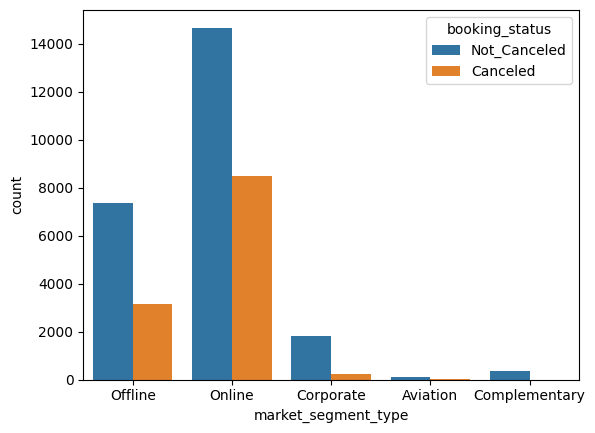

In [44]:
sn.countplot(data=df, x="market_segment_type", hue="booking_status")

<AxesSubplot: xlabel='repeated_guest', ylabel='count'>

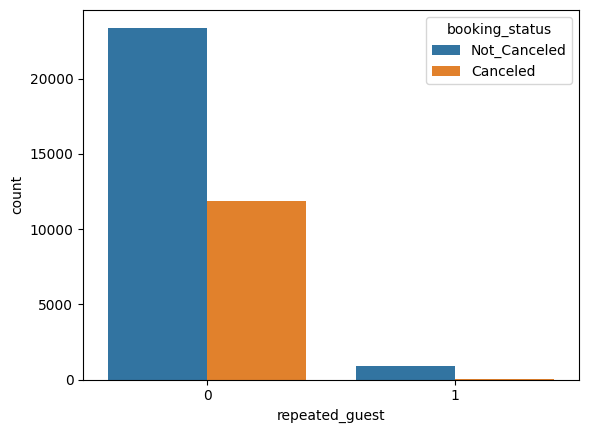

In [45]:
sn.countplot(data=df, x="repeated_guest", hue="booking_status")

<AxesSubplot: xlabel='no_of_previous_cancellations', ylabel='count'>

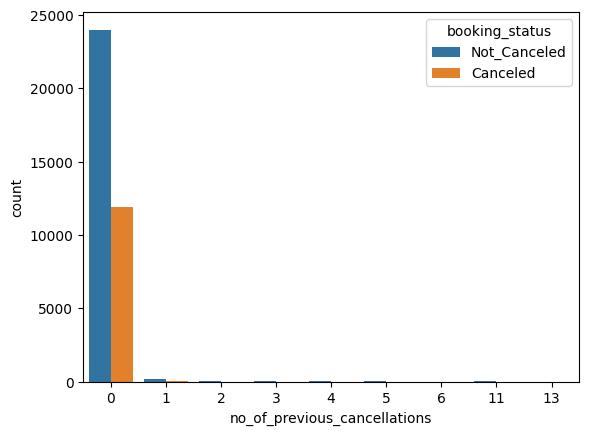

In [46]:
sn.countplot(data=df,x="no_of_previous_cancellations",hue="booking_status")

<AxesSubplot: xlabel='no_of_previous_bookings_not_canceled', ylabel='count'>

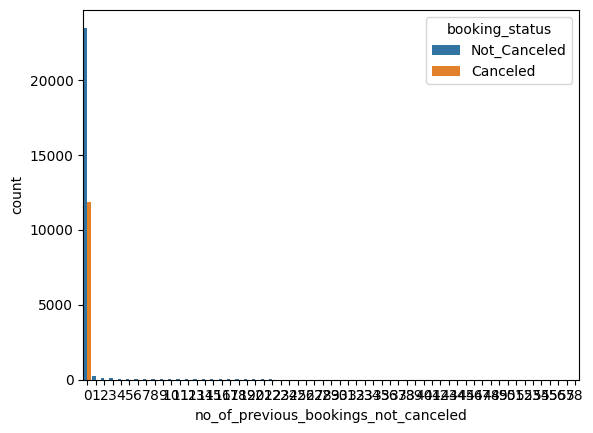

In [47]:
sn.countplot(data=df,x="no_of_previous_bookings_not_canceled",hue="booking_status")

<AxesSubplot: xlabel='no_of_special_requests', ylabel='count'>

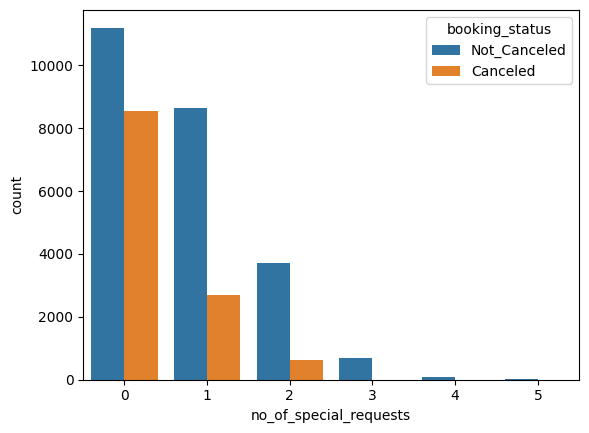

In [48]:
sn.countplot(data=df, x="no_of_special_requests", hue="booking_status")

In [49]:
## Proves point of havign no_of_special_requests as classes eg None, Low(1-3) High(3+)
df['class_special_requests'] = df['no_of_special_requests'].map({0:'None',1:'Low',2:'Low',3:'Medium',4:'High',5:'High'})

<AxesSubplot: xlabel='class_special_requests', ylabel='count'>

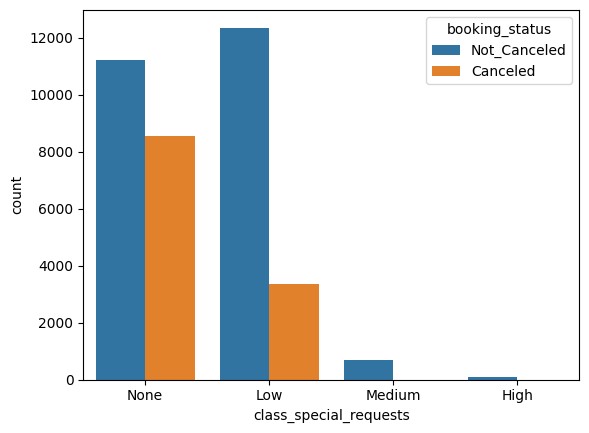

In [50]:
sn.countplot(data=df, x="class_special_requests", hue="booking_status")

In [51]:
# Group, Couple, Individual, Family bookings

df['no_of_people'] = df.no_of_adults + df.no_of_children

<AxesSubplot: xlabel='no_of_people', ylabel='count'>

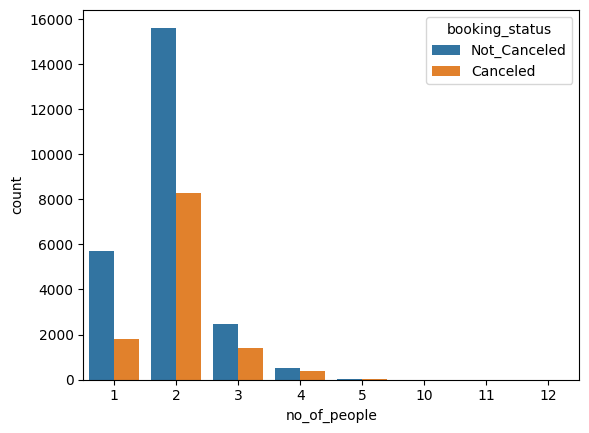

In [52]:
sn.countplot(data=df, x="no_of_people", hue="booking_status")

In [53]:
def peopleClassifier(row):
    a = row['no_of_adults']
    c = row['no_of_children']
    s = a+c

    if a == 1 and c == 0:
        return "Individual"
    if a == 2 and c == 0:
        return "Couple"
    if a <= 2 and c <= 4:
        return "Family"
    if c > 5:
        return "Sports Team"
    if a > 2:
        return "Group"
    return "Other"
    

In [54]:
df["bookingType"] = df.apply(peopleClassifier, axis=1)


<AxesSubplot: xlabel='bookingType', ylabel='count'>

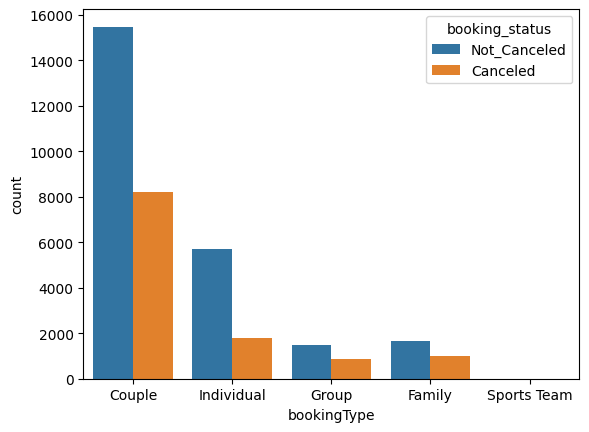

In [55]:
sn.countplot(data=df, x="bookingType", hue="booking_status")

<AxesSubplot: xlabel='arrival_month', ylabel='count'>

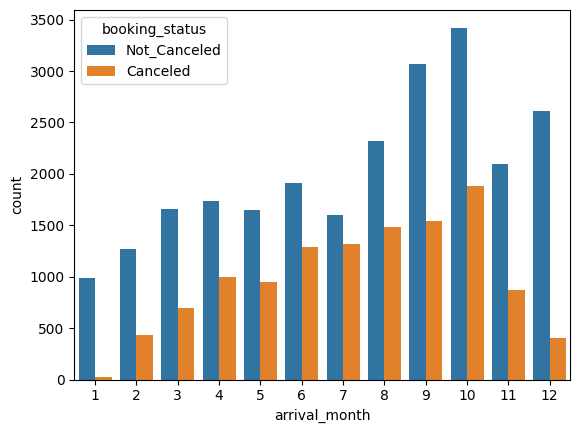

In [56]:
sn.countplot(data=df, x="arrival_month", hue="booking_status")

<AxesSubplot: xlabel='room_type_reserved', ylabel='count'>

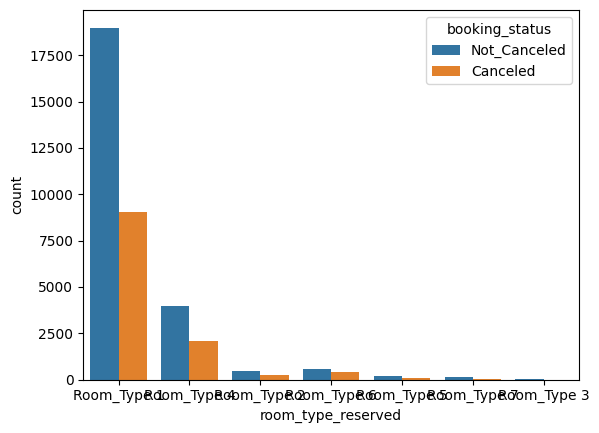

In [57]:
sn.countplot(data=df, x="room_type_reserved", hue="booking_status")

<AxesSubplot: xlabel='arrival_year', ylabel='count'>

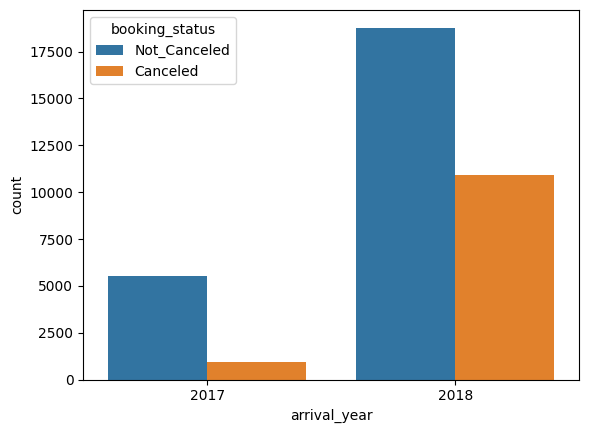

In [58]:
sn.countplot(data=df, x="arrival_year", hue="booking_status")

In [59]:
temp = df.rename(columns={
    'arrival_year': 'year',
    'arrival_month': 'month',
    'arrival_date': 'day'
})

df['date'] = pd.to_datetime(temp[['year', 'month', 'day']], errors='coerce')

In [60]:
df['week'] = df['date'].dt.isocalendar().week.astype(float)

In [61]:
df["weekday"]  = df['date'].dt.weekday

<AxesSubplot: xlabel='weekday', ylabel='count'>

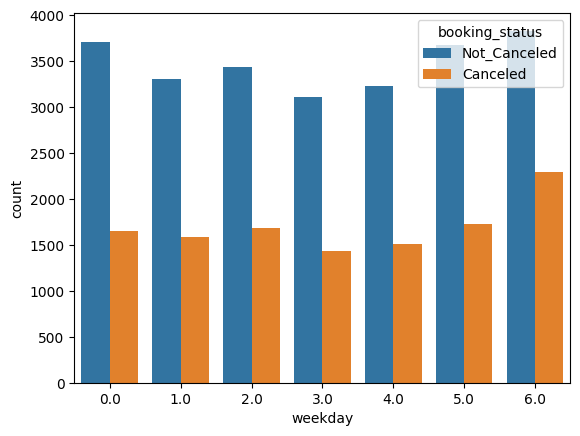

In [62]:
sn.countplot(data=df, x="weekday", hue="booking_status")

<AxesSubplot: xlabel='week', ylabel='Count'>

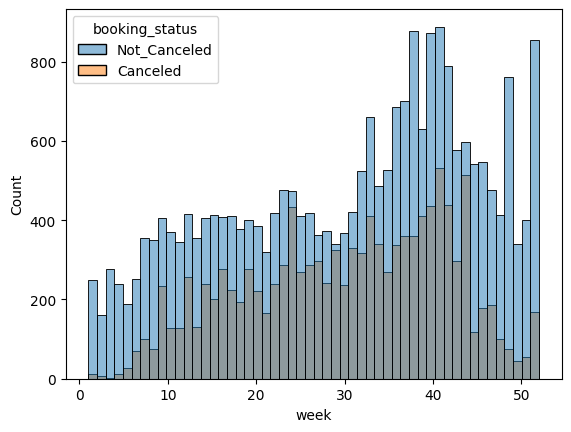

In [64]:
sn.histplot(data=df, x="week", hue="booking_status", bins=52)

In [65]:
df["no_of_previous_bookings"] = df["no_of_previous_bookings_not_canceled"] + df["no_of_previous_cancellations"]

In [66]:
df["repeate_customer"] =  df["no_of_previous_bookings"] > 0

In [67]:

def convertTooEarly(df):
    if df["lead_time"] > 150:
        return "y"
    return "n"
    
df["too_early"] =  df.apply(convertTooEarly, axis=1)

In [68]:
df["too_early"].unique()

array(['y', 'n'], dtype=object)

<AxesSubplot: xlabel='lead_time', ylabel='Count'>

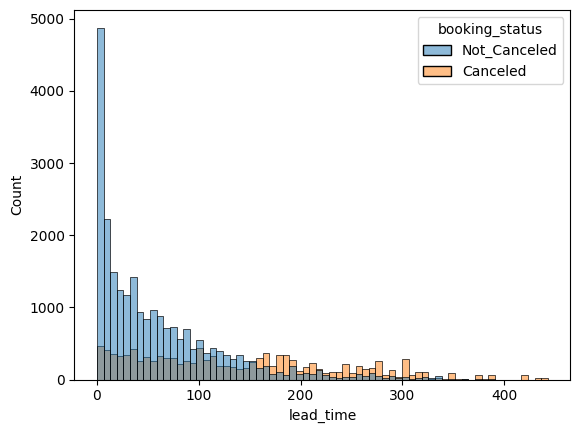

In [69]:
sn.histplot(data=df, x="lead_time",hue="booking_status")

<AxesSubplot: xlabel='count', ylabel='room_type_reserved'>

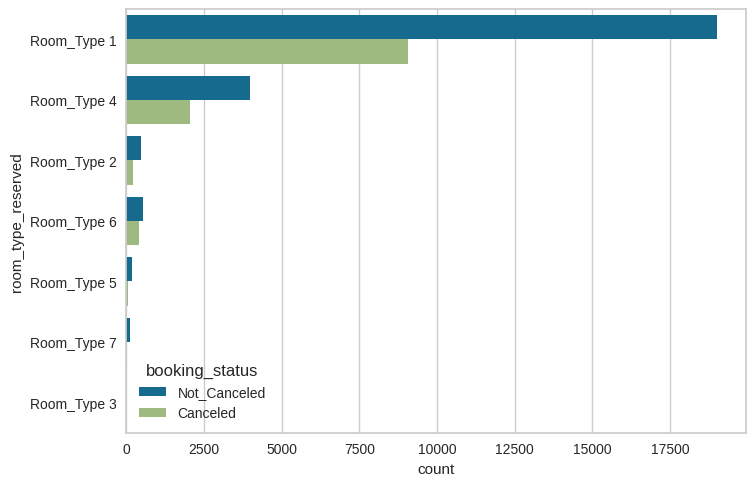

In [76]:
sn.countplot(data=df, y="room_type_reserved", hue="booking_status")

<AxesSubplot: xlabel='type_of_meal_plan', ylabel='count'>

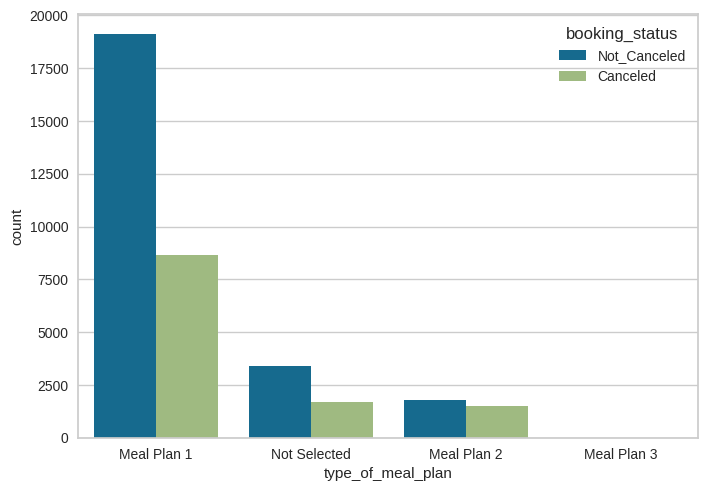

In [77]:
sn.countplot(data=df, x= "type_of_meal_plan", hue="booking_status")

In [70]:
df_dummy = df[["week","bookingType","type_of_meal_plan","class_special_requests","market_segment_type","avg_price_per_room","lead_time","no_of_days","booking_status","repeate_customer","room_type_reserved","too_early","weekday"]] #",y="

<AxesSubplot: >

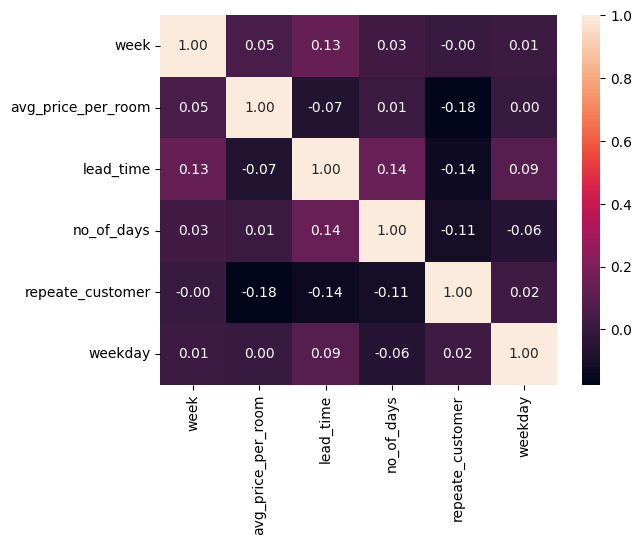

In [71]:
sn.heatmap(df_dummy.corr(), annot = True, fmt= '.2f')

In [72]:
from pycaret.classification import *


reg = setup(
        data=df_dummy, 
        target="booking_status", 
        categorical_features=["week","bookingType","type_of_meal_plan","class_special_requests","market_segment_type","room_type_reserved","too_early"],
        numeric_features=["avg_price_per_room","no_of_days","lead_time","repeate_customer","weekday"],
        train_size=0.8, 
        normalize=True,
        preprocess=True,
        polynomial_features = True,
#        polynomial_degree=3
       
    )
model = compare_models() 
evaluate_model(model)
predict_model(model)

,Description,Value
0,Session id,2176
1,Target,booking_status
2,Target type,Binary
3,Target mapping,"Canceled: 0, Not_Canceled: 1"
4,Original data shape,"(36197, 13)"
5,Transformed data shape,"(36197, 561)"
6,Transformed train set shape,"(28957, 561)"
7,Transformed test set shape,"(7240, 561)"
8,Ordinal features,1
9,Numeric features,5


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8926,0.9438,0.8926,0.8917,0.8913,0.7512,0.7528,0.4250
et,Extra Trees Classifier,0.8836,0.9380,0.8836,0.8824,0.8824,0.7313,0.7324,0.6650
lightgbm,Light Gradient Boosting Machine,0.8804,0.9362,0.8804,0.8792,0.8786,0.7215,0.7238,0.3470
gbc,Gradient Boosting Classifier,0.8571,0.9105,0.8571,0.8553,0.8540,0.6639,0.6679,1.9290
dt,Decision Tree Classifier,0.8530,0.8398,0.8530,0.8543,0.8535,0.6693,0.6695,0.2560
knn,K Neighbors Classifier,0.8523,0.8955,0.8523,0.8504,0.8507,0.6584,0.6596,0.9700
ada,Ada Boost Classifier,0.8387,0.8915,0.8387,0.8361,0.8354,0.6210,0.6247,0.9020
lr,Logistic Regression,0.8342,0.8841,0.8342,0.8314,0.8303,0.6088,0.6132,1.9450
ridge,Ridge Classifier,0.8312,0.0000,0.8312,0.8283,0.8271,0.6011,0.6058,0.1870
lda,Linear Discriminant Analysis,0.8305,0.8780,0.8305,0.8274,0.8269,0.6015,0.6051,0.5370


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8964,0.9469,0.8964,0.8955,0.8951,0.7596,0.7614


,week,bookingType,type_of_meal_plan,class_special_requests,market_segment_type,avg_price_per_room,lead_time,no_of_days,repeate_customer,room_type_reserved,too_early,weekday,booking_status,prediction_label,prediction_score
31543,39.0,Individual,Meal Plan 1,None,Corporate,67.000000,5,1,True,Room_Type 1,n,4.0,Not_Canceled,Not_Canceled,1.00
17216,47.0,Couple,Meal Plan 1,None,Online,120.000000,1,1,False,Room_Type 1,n,4.0,Not_Canceled,Not_Canceled,1.00
32075,44.0,Couple,Meal Plan 1,Low,Offline,37.070000,21,3,False,Room_Type 1,n,6.0,Not_Canceled,Not_Canceled,1.00
31160,37.0,Couple,Meal Plan 1,None,Online,67.489998,35,7,False,Room_Type 1,n,3.0,Not_Canceled,Not_Canceled,0.67
5958,11.0,Individual,Meal Plan 1,None,Corporate,65.000000,40,3,True,Room_Type 1,n,1.0,Not_Canceled,Not_Canceled,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16288,14.0,Couple,Not Selected,None,Online,76.500000,73,3,False,Room_Type 1,n,1.0,Canceled,Canceled,0.97
13348,38.0,Couple,Meal Plan 1,None,Offline,65.000000,60,2,False,Room_Type 1,n,3.0,Not_Canceled,Not_Canceled,1.00
24105,9.0,Couple,Meal Plan 1,None,Online,80.300003,54,2,False,Room_Type 1,n,0.0,Not_Canceled,Not_Canceled,0.66
21467,35.0,Couple,Meal Plan 1,None,Online,90.949997,228,6,False,Room_Type 1,y,0.0,Canceled,Canceled,0.98


In [73]:

reg = setup(
        data=df_dummy, 
        target="booking_status", 
        categorical_features=["week","bookingType","type_of_meal_plan","class_special_requests","market_segment_type","room_type_reserved","too_early","weekday"],
        numeric_features=["avg_price_per_room","no_of_days","lead_time","repeate_customer"],
        train_size=0.8, 
        normalize=True,
        preprocess=True,       
    )
model = compare_models() 
evaluate_model(model)
predict_model(model)

,Description,Value
0,Session id,2994
1,Target,booking_status
2,Target type,Binary
3,Target mapping,"Canceled: 0, Not_Canceled: 1"
4,Original data shape,"(36197, 13)"
5,Transformed data shape,"(36197, 39)"
6,Transformed train set shape,"(28957, 39)"
7,Transformed test set shape,"(7240, 39)"
8,Ordinal features,1
9,Numeric features,4


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8933,0.9424,0.8933,0.8924,0.8920,0.7525,0.7542,0.1010
et,Extra Trees Classifier,0.8803,0.9341,0.8803,0.8791,0.8792,0.7237,0.7248,0.1540
lightgbm,Light Gradient Boosting Machine,0.8784,0.9340,0.8784,0.8771,0.8769,0.7180,0.7197,0.1720
dt,Decision Tree Classifier,0.8546,0.8402,0.8546,0.8556,0.8550,0.6722,0.6724,0.0440
gbc,Gradient Boosting Classifier,0.8478,0.9035,0.8478,0.8457,0.8444,0.6415,0.6457,0.2320
knn,K Neighbors Classifier,0.8467,0.8905,0.8467,0.8446,0.8449,0.6448,0.6462,0.1300
ada,Ada Boost Classifier,0.8177,0.8746,0.8177,0.8149,0.8156,0.5779,0.5791,0.1000
lr,Logistic Regression,0.8119,0.8589,0.8119,0.8082,0.8087,0.5605,0.5628,0.0520
lda,Linear Discriminant Analysis,0.8084,0.8548,0.8084,0.8043,0.8045,0.5499,0.5531,0.0500
ridge,Ridge Classifier,0.8063,0.0000,0.8063,0.8019,0.8015,0.5422,0.5465,0.0350


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8936,0.9422,0.8936,0.8926,0.8926,0.7543,0.7555


,week,bookingType,type_of_meal_plan,class_special_requests,market_segment_type,avg_price_per_room,lead_time,no_of_days,repeate_customer,room_type_reserved,too_early,weekday,booking_status,prediction_label,prediction_score
7604,25.0,Individual,Meal Plan 1,None,Online,90.900002,81,1,False,Room_Type 1,n,5.0,Canceled,Canceled,0.980
15920,28.0,Group,Meal Plan 1,Low,Offline,96.900002,132,8,False,Room_Type 1,n,3.0,Not_Canceled,Not_Canceled,0.960
2739,16.0,Individual,Meal Plan 1,None,Online,93.900002,35,3,False,Room_Type 1,n,1.0,Canceled,Canceled,0.930
18031,38.0,Couple,Meal Plan 1,Low,Online,149.399994,109,3,False,Room_Type 4,n,3.0,Not_Canceled,Not_Canceled,0.610
9360,5.0,Couple,Meal Plan 1,None,Offline,50.330002,34,6,False,Room_Type 1,n,2.0,Not_Canceled,Not_Canceled,0.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30694,46.0,Couple,Not Selected,Low,Online,92.400002,43,3,False,Room_Type 1,n,0.0,Not_Canceled,Not_Canceled,0.960
28773,28.0,Couple,Meal Plan 1,Low,Online,96.300003,202,2,False,Room_Type 1,y,0.0,Not_Canceled,Canceled,0.505
33277,43.0,Individual,Meal Plan 1,None,Corporate,65.000000,3,1,False,Room_Type 1,n,5.0,Not_Canceled,Not_Canceled,0.980
33099,19.0,Individual,Meal Plan 1,None,Offline,88.800003,18,2,False,Room_Type 1,n,2.0,Not_Canceled,Not_Canceled,0.860


In [74]:
reg = setup(
        data=df_dummy, 
        target="booking_status", 
        categorical_features=["week","bookingType","type_of_meal_plan","class_special_requests","market_segment_type","room_type_reserved","too_early","weekday"],
        numeric_features=["avg_price_per_room","no_of_days","lead_time","repeate_customer"],
        train_size=0.9, 
        normalize=True,
        preprocess=True,  
        fix_imbalance = True,
        remove_outliers = True,
        normalize_method="robust"
    
    )

top3 = compare_models(n_select = 3)
tuned_top3 = [tune_model(i) for i in top3]
blender = blend_models(tuned_top3)
stacker = stack_models(tuned_top3)
best_auc_model = automl(optimize = 'AUC')
evaluate_model(best_auc_model)
predict_model(best_auc_model)

,Description,Value
0,Session id,8805
1,Target,booking_status
2,Target type,Binary
3,Target mapping,"Canceled: 0, Not_Canceled: 1"
4,Original data shape,"(36197, 13)"
5,Transformed data shape,"(45370, 39)"
6,Transformed train set shape,"(41750, 39)"
7,Transformed test set shape,"(3620, 39)"
8,Ordinal features,1
9,Numeric features,4


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8913,0.9416,0.8913,0.8903,0.8902,0.7489,0.7501,0.3200
et,Extra Trees Classifier,0.8827,0.9353,0.8827,0.8817,0.8819,0.7304,0.7311,0.3160
lightgbm,Light Gradient Boosting Machine,0.8745,0.9307,0.8745,0.8734,0.8736,0.7116,0.7122,0.3610
dt,Decision Tree Classifier,0.8522,0.8396,0.8522,0.8538,0.8528,0.6679,0.6682,0.2520
gbc,Gradient Boosting Classifier,0.8385,0.8998,0.8385,0.8413,0.8396,0.6389,0.6395,0.5910
knn,K Neighbors Classifier,0.8325,0.8892,0.8325,0.8364,0.8339,0.6272,0.6281,0.3990
ada,Ada Boost Classifier,0.8052,0.8654,0.8052,0.8098,0.8069,0.5666,0.5677,0.3410
lda,Linear Discriminant Analysis,0.7935,0.8560,0.7935,0.8044,0.7968,0.5495,0.5529,0.2560
ridge,Ridge Classifier,0.7932,0.0000,0.7932,0.8039,0.7964,0.5485,0.5519,0.2420
lr,Logistic Regression,0.7872,0.8577,0.7872,0.8008,0.7911,0.5390,0.5437,0.3160


Processing:   0%|          | 0/63 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8309,0.8872,0.8309,0.8312,0.8310,0.6172,0.6173
1,0.8413,0.9013,0.8413,0.8420,0.8416,0.6417,0.6418
2,0.8358,0.8964,0.8358,0.8389,0.8370,0.6334,0.6341
3,0.8272,0.8923,0.8272,0.8287,0.8279,0.6113,0.6115
4,0.8370,0.8872,0.8370,0.8380,0.8375,0.6325,0.6326
5,0.8441,0.8949,0.8441,0.8446,0.8443,0.6475,0.6476
6,0.8410,0.8992,0.8410,0.8437,0.8421,0.6445,0.6451
7,0.8456,0.8946,0.8456,0.8458,0.8457,0.6504,0.6504
8,0.8483,0.9071,0.8483,0.8510,0.8493,0.6609,0.6615


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7962,0.8599,0.7962,0.8042,0.7989,0.5519,0.5540
1,0.7999,0.8739,0.7999,0.8084,0.8027,0.5608,0.5632
2,0.7901,0.8713,0.7901,0.8038,0.7940,0.5456,0.5503
3,0.7848,0.8618,0.7848,0.7956,0.7883,0.5303,0.5334
4,0.7922,0.8589,0.7922,0.8005,0.7950,0.5434,0.5456
5,0.7996,0.8694,0.7996,0.8087,0.8025,0.5607,0.5634
6,0.7922,0.8694,0.7922,0.8037,0.7957,0.5474,0.5511
7,0.8004,0.8670,0.8004,0.8110,0.8037,0.5645,0.5680
8,0.8146,0.8851,0.8146,0.8252,0.8176,0.5959,0.5998


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8852,0.9416,0.8852,0.8840,0.8837,0.7337,0.7354
1,0.8904,0.9409,0.8904,0.8894,0.8891,0.7462,0.7477
2,0.8828,0.9402,0.8828,0.8817,0.8819,0.7307,0.7313
3,0.8821,0.9411,0.8821,0.8809,0.8809,0.7277,0.7289
4,0.8806,0.9402,0.8806,0.8794,0.8788,0.7221,0.7243
5,0.8935,0.9454,0.8935,0.8925,0.8922,0.7529,0.7546
6,0.8969,0.9417,0.8969,0.8959,0.8958,0.7615,0.7628
7,0.8858,0.9398,0.8858,0.8846,0.8844,0.7350,0.7367
8,0.8916,0.9477,0.8916,0.8908,0.8910,0.7517,0.7520


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Info] Number of positive: 18682, number of negative: 18682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8950,0.9459,0.8950,0.8942,0.8936,0.7562,0.7581
1,0.8935,0.9452,0.8935,0.8925,0.8922,0.7532,0.7548
2,0.8929,0.9443,0.8929,0.8919,0.8921,0.7538,0.7544
3,0.8941,0.9460,0.8941,0.8931,0.8932,0.7559,0.7568
4,0.8913,0.9412,0.8913,0.8904,0.8899,0.7477,0.7496
5,0.8966,0.9482,0.8966,0.8956,0.8955,0.7610,0.7621
6,0.9009,0.9469,0.9009,0.9000,0.8999,0.7713,0.7722
7,0.8971,0.9452,0.8971,0.8964,0.8957,0.7606,0.7629
8,0.9014,0.9554,0.9014,0.9007,0.9008,0.7736,0.7742


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will b

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8944,0.9447,0.8944,0.8934,0.8935,0.7566,0.7575
1,0.8923,0.9439,0.8923,0.8913,0.8913,0.7517,0.7526
2,0.8932,0.9449,0.8932,0.8925,0.8927,0.7559,0.7561
3,0.8947,0.9476,0.8947,0.8938,0.8940,0.7583,0.7588
4,0.8895,0.9440,0.8895,0.8884,0.8884,0.7450,0.7460
5,0.8972,0.9493,0.8972,0.8964,0.8966,0.7641,0.7646
6,0.9015,0.9472,0.9015,0.9007,0.9008,0.7736,0.7741
7,0.8968,0.9472,0.8968,0.8959,0.8956,0.7610,0.7625
8,0.9014,0.9554,0.9014,0.9011,0.9012,0.7755,0.7756


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Info] Number of positive: 18725, number of negative: 18725
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008721 seconds.
You can set `force_row_wise=true` to remove the

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.9006,0.9477,0.9006,0.8998,0.9000,0.7721,0.7725


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


,week,bookingType,type_of_meal_plan,class_special_requests,market_segment_type,avg_price_per_room,lead_time,no_of_days,repeate_customer,room_type_reserved,too_early,weekday,booking_status,prediction_label,prediction_score
3710,11.0,Individual,Meal Plan 1,Low,Corporate,50.000000,0,1,False,Room_Type 1,n,5.0,Not_Canceled,Not_Canceled,0.9542
14910,11.0,Couple,Not Selected,Low,Online,97.000000,1,1,False,Room_Type 1,n,3.0,Not_Canceled,Not_Canceled,0.9558
35955,38.0,Couple,Meal Plan 1,None,Offline,90.000000,141,1,False,Room_Type 1,n,2.0,Not_Canceled,Not_Canceled,0.7405
25664,24.0,Individual,Meal Plan 2,None,Offline,90.000000,256,2,False,Room_Type 1,y,4.0,Not_Canceled,Not_Canceled,0.9638
11084,12.0,Couple,Meal Plan 1,None,Online,78.150002,75,2,False,Room_Type 2,n,2.0,Not_Canceled,Not_Canceled,0.8729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27109,39.0,Couple,Meal Plan 1,Low,Offline,75.000000,28,1,False,Room_Type 1,n,3.0,Not_Canceled,Not_Canceled,0.9683
12722,42.0,Family,Meal Plan 1,Low,Online,153.050003,69,5,False,Room_Type 6,n,1.0,Not_Canceled,Not_Canceled,0.5346
17423,52.0,Couple,Meal Plan 1,None,Online,102.599998,119,2,False,Room_Type 4,n,0.0,Canceled,Canceled,0.5595
34937,6.0,Couple,Meal Plan 2,None,Online,129.000000,12,3,False,Room_Type 1,n,2.0,Canceled,Canceled,0.6702


In [75]:
save_model(best_auc_model, 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['avg_price_per_room', 'no_of_days',
                                              'lead_time', 'repeate_customer'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               ke...
                                                                 subsample_for_bin=200000,
                                                                 subsample_freq=0))],
                                  

# Running alternate data set

In [82]:
df = pd.read_csv("hotel_booking.csv")

In [83]:
df["no_of_adults"] = df["adults"]

df["no_of_children"] = df["children"] + df["babies"]


df['no_of_people'] = df.no_of_adults + df.no_of_children

In [84]:
def peopleClassifier(row):
    a = row['no_of_adults']
    c = row['no_of_children']
    s = a+c

    if a == 1 and c == 0:
        return "Individual"
    if a == 2 and c == 0:
        return "Couple"
    if a <= 2 and c <= 4:
        return "Family"
    if c > 5:
        return "Sports Team"
    if a > 2:
        return "Group"
    return "Other"
    
    
df["bookingType"] = df.apply(peopleClassifier, axis=1)

In [85]:
df["type_of_meal_plan"]= df["meal"]

In [86]:
def convertTooEarly(df):
    if df["lead_time"] > 150:
        return "y"
    return "n"
    
df["too_early"] =  df.apply(convertTooEarly, axis=1)

In [87]:
df["repeate_customer"] =  df["is_repeated_guest"]

In [88]:
df['week'] = df["arrival_date_week_number"]

In [89]:
df["no_of_days"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

In [90]:
### Proves point of havign no_of_special_requests as classes eg None, Low(1-3) High(3+)
df['class_special_requests'] = df['total_of_special_requests'].map({0:'None',1:'Low',2:'Low',3:'Medium',4:'High',5:'High'})

In [91]:
import calendar

d = dict((v,k) for k,v in enumerate(calendar.month_abbr))

def mapMMM(r):
    return d[r]

df["_arrival_date_month"] = df["arrival_date_month"].str[:3].apply(mapMMM)

temp = df.rename(columns={
    'arrival_date_year': 'year',
    '_arrival_date_month': 'month',
    'arrival_date_day_of_month': 'day'
})

df['date'] = pd.to_datetime(temp[['year', 'month', 'day']], errors='coerce')


df["weekday"]  = df['date'].dt.weekday

In [92]:
df["market_segment_type"] = df["market_segment"]

In [93]:
df["room_type_reserved"] = df["reserved_room_type"]

In [94]:
df["booking_status"] = df["is_canceled"]

In [95]:
df["avg_price_per_room"] = df.adr

In [96]:
df_dummy = df[["week","bookingType","type_of_meal_plan","class_special_requests","market_segment_type","room_type_reserved","too_early","weekday","avg_price_per_room","no_of_days","lead_time","repeate_customer","booking_status"]]

In [97]:
from pycaret.classification import *


reg = setup(
        data=df_dummy, 
        target="booking_status", 
        categorical_features=["week","bookingType","type_of_meal_plan","class_special_requests","market_segment_type","room_type_reserved","too_early"],
        numeric_features=["avg_price_per_room","no_of_days","lead_time","repeate_customer","weekday"],
        train_size=0.9, 
        normalize=True,
        preprocess=True,
        
       
    )
model = create_model("rf", return_train_score=True)
evaluate_model(model)
predict_model(model)

,Description,Value
0,Session id,6730
1,Target,booking_status
2,Target type,Binary
3,Original data shape,"(119390, 13)"
4,Transformed data shape,"(119390, 41)"
5,Transformed train set shape,"(107451, 41)"
6,Transformed test set shape,"(11939, 41)"
7,Ordinal features,1
8,Numeric features,5
9,Categorical features,7


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8434,0.9027,0.7153,0.8381,0.7718,0.6537,0.6585


,week,bookingType,type_of_meal_plan,class_special_requests,market_segment_type,room_type_reserved,too_early,weekday,avg_price_per_room,no_of_days,lead_time,repeate_customer,booking_status,prediction_label,prediction_score
94788,33,Family,BB,Low,Online TA,A,n,1,152.100006,1,35,0,0,0,0.7700
25175,25,Family,HB,None,Direct,G,n,4,218.100006,4,71,0,0,0,0.6700
24298,21,Couple,BB,None,Corporate,A,n,1,63.000000,2,1,0,0,0,0.9417
111615,19,Couple,BB,Low,Offline TA/TO,A,n,1,85.000000,4,104,0,0,0,0.9500
37888,26,Couple,HB,Low,Direct,A,n,4,185.000000,2,1,0,0,0,0.7900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83052,3,Couple,BB,Low,Offline TA/TO,A,n,3,52.000000,3,50,0,0,0,1.0000
48125,12,Individual,BB,Low,Online TA,D,n,3,88.830002,4,71,0,0,0,0.7300
24395,21,Individual,BB,None,Direct,A,n,3,42.000000,1,1,0,0,0,0.9650
83823,7,Couple,BB,Low,Direct,E,n,5,105.000000,1,1,0,0,0,1.0000
